### This code file covers the following functions()

1. Get the list of stores  : GetListOfStores(txn_df)
   
2. Summary stats like number of unique customers, transactions and products : TransactionSummary(txn_df, store)

3. Trend : Number of unique customers and sales amount end to end - monthwise : EndToEndCustomersAndSalesMonthlyLevel(txn_df, store)

4. Trend : Number of unique customers and sales amount end to end - daily level : EndToEndCustomersAndSalesDailyLevel(txn_df, store)  

5. Number of unique customers and sales amount end to end - weekdays : CustomersAndSalesWeekDays(txn_df, store)

6. Number of unique customers and sales amount end to end - days of month : CustomersAndSalesDaysOfMonth(txn_df, store)

7. Given a customer, provide age, store, frequently used payment method, RFM etc : GetCustomerInfo(customerID)

8. Monthly revenue for a given store : GetMonthlyRevenueForStore() - TBD

9. Function to generate list of products in each transaction : GenerateTxnProductList(product_df, attribute, store_name)


In [1]:
%matplotlib inline
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime, timedelta

In [2]:
txn_df = pd.read_csv( "/Users/svattiku/Google Drive/BDA/ProjectBDA/Retail_Data/transaction_data.csv")
txn_df['transactionDate'] = pd.to_datetime(txn_df.transactionDate, format = '%Y-%m-%d')

In [55]:
product_df = pd.read_csv( "/Users/svattiku/Google Drive/BDA/ProjectBDA/Retail_Data/product_data.csv", 
                         dtype={'product_code':str})
product_df['transactionDate'] = pd.to_datetime(product_df.transactionDate, format = '%Y-%m-%d')

In [23]:
product_df['transactionDate'] = pd.to_datetime(product_df.transactionDate, format = '%Y-%m-%d')

In [4]:
product_df.head(5)

,Unnamed: 0,customerID,DOB,Gender,State,PinCode,transactionDate,store_code,store_description,till_no,transaction_number_by_till,promo_code,promotion_description,product_code,product_description,sale_price_after_promo,discountUsed
0,0,MMID_2041,1981-10-18,male,NaN,452001,2016-01-19,2655,MM-INDORE-MALHAR MEGA MALL,2,51535,NONPROMO,NaN,300785147.0,BB-CB-16X20X168SWG-Suitable for ROI New,2.0,Payback
1,1,MMID_2041,1981-10-18,male,NaN,452001,2016-06-21,2655,MM-INDORE-MALHAR MEGA MALL,21,57836,NONPROMO,NaN,1000315939.0,SOO FRESH ROLL PIZZA 1PLT,40.0,Payback
2,2,MMID_2041,1981-10-18,male,NaN,452001,2016-04-07,2655,MM-INDORE-MALHAR MEGA MALL,21,43394,NONPROMO,NaN,1000314595.0,SOO FRESH PUFF PEAS & POTATO 1PLT,35.0,Payback
3,3,MMID_2041,1981-10-18,male,NaN,452001,2016-03-19,2655,MM-INDORE-MALHAR MEGA MALL,21,39335,NONPROMO,NaN,300930107.0,SOFRSH VD EGGS REGULAR 6P,72.0,Payback
4,4,MMID_2041,1981-10-18,male,NaN,452001,2016-01-19,2655,MM-INDORE-MALHAR MEGA MALL,2,51535,NONPROMO,NaN,1000010393.0,SOO FRESH BREAD BROWN 400g,15.0,Payback


## Generic function to plot horizontal bar chart

Usage : 
Input parameters : Data frame, x-axis column name, y-axis column name, size of the chart

In [5]:
def PlotHorizontalBarChart(df,xax,yax, sizex, sizey):
    fig, ax = plt.subplots()

    fig.set_size_inches(10, 5)
    fig.tight_layout()


    ax.barh(df[xax], df[yax], align='center')
    ax.set_yticks(df[xax])
    ax.set_yticklabels(df[xax])
    ax.invert_yaxis()  # labels read top-to-bottom
    ax.set_xlabel(yax)
    ax.set_ylabel(xax)
    ax.set_title(str(xax+" and "+yax))
    for i, v in enumerate(df[yax]):
        ax.text(v + 3, i + .25, str(round(v,0)))
    plt.show()

In [6]:
# Get the list of stores

def GetListOfStores(txn_df):
    listOfStores = txn_df.store_description.unique()
    return listOfStores

In [7]:
# Summary stats like number of unique customers, transactions and products
# Details can be fetched for all stores together or at a store level

def TransactionSummary(txn_df, store="ALL"):
    if (store == "ALL"):
        txn_store_df = txn_df
    else:
        txn_store_df = txn_df[txn_df.store_description == store]
        
    data_t = {'Description':['No. of records in the dataset',
                    'No. of unqiue orders',
                    'No. of unqiue customers',
                    'No. of unqiue stores',
                    'Start date',
                    'End date',
                    'No. of days data available'
                    ],
                'Value':[len(txn_store_df),
                     len(txn_store_df.transaction_number_by_till.unique()),
                     len(txn_store_df.customerID.unique()),
                     len(txn_store_df.store_code.unique()),
                     txn_store_df.transactionDate.min(),
                     txn_store_df.transactionDate.max(),
                     (pd.to_datetime(txn_store_df.transactionDate, format='%Y-%m-%d').max()-pd.to_datetime(txn_store_df.transactionDate, format='%Y-%m-%d').min()).days
                    ]
               }
    df_t = pd.DataFrame(data_t)

    print(df_t)    

In [8]:
TransactionSummary(txn_df)

                     Description                Value
0  No. of records in the dataset               866277
1           No. of unqiue orders               100052
2        No. of unqiue customers               164079
3           No. of unqiue stores                    7
4                     Start date  2015-05-01 00:00:00
5                       End date  2017-06-30 00:00:00
6     No. of days data available                  791


In [9]:
TransactionSummary(txn_df, "MM-INDORE-MALHAR MEGA MALL")

                     Description                Value
0  No. of records in the dataset               201600
1           No. of unqiue orders                78776
2        No. of unqiue customers                45947
3           No. of unqiue stores                    1
4                     Start date  2015-08-07 00:00:00
5                       End date  2017-06-30 00:00:00
6     No. of days data available                  693


In [10]:
GetListOfStores(txn_df)

array(['MM-INDORE-MALHAR MEGA MALL', 'MM-LUDHIANA-FEROZEPUR-MF',
       'MM-MADURAI-KOCHADAI VILLAGE', 'MM-INDORE-TREASURE ISLAND',
       'MM-AMRITSAR-TRILIUM MALL', 'MM-HUBLI-GOKUL ROAD-AKSHAY CEN',
       'MM-JAMSHEDPUR-NH-33'], dtype=object)

In [11]:
def calculate_age(DateOfBirth):
    from datetime import date
    from datetime import datetime, timedelta
    DateOfBirth = datetime.strptime(str(DateOfBirth), "%Y-%m-%d").date()
    today = date.today()
    return today.year - DateOfBirth.year - ((today.month, today.day) < (DateOfBirth.month, DateOfBirth.day))

In [12]:
#dateAfter = strptime("2017-07-01", "%Y-%m-%d") - 180


numOfDays = 180

#txn_df.query('dateAfter    

In [24]:
# numOfDays = -1 if all data needs to be considered
def GetStoreLevelDetailsDuration(numOfDays):
    listOfStores = GetListOfStores(txn_df)
    tills = 0
    customers = 0
    products = 0
    revenue = 0
    revenuePerTill = 0
    AminusAvg = 0
    output_df = pd.DataFrame(columns=["Store", "Tills", "Transactions", "Customers", "Products", "Revenue(Lakhs)", "Revenue(Lakhs)/Till [A]", "[A] - Avg (Lakhs)", "([A] - Avg)/Avg"])

    # Get data for specific days
    if (numOfDays > 0 ):  
        fileName = "StoreLevelDetailsDuration_"+str(numOfDays)+"_days.csv"
        
        start = '07/01/2017'
        start = datetime.strptime(start, "%m/%d/%Y") #string to date
        dayAfter = start - timedelta(days=numOfDays) # date - days
        #product_duration_df = product_df[datetime.strptime(product_df['transactionDate'], "%m/%d/%Y") >= dayAfter]
        
        product_duration_df = product_df[product_df.transactionDate >= dayAfter]
        
        txn_duration_df = txn_df[txn_df['transactionDate'] >= dayAfter]
    else :
        fileName = "StoreLevelDetailsDuration_ALL_days.csv"
        product_duration_df = product_df
        txn_duration_df = txn_df
    
    product_duration_df['transactionDate'] = pd.to_datetime(product_duration_df.transactionDate, format = '%Y-%m-%d')
    
    for store in listOfStores:
        print(store)
        txn_store_df = txn_duration_df[txn_duration_df['store_description'] == store]
        prod_store_df = product_duration_df[product_duration_df['store_description'] == store]
        tills = len(txn_store_df['till_no'].unique())
        transactions = len(txn_store_df['transaction_number_by_till'].unique())        
        customers = len(txn_store_df['customerID'].unique())
        products = len(prod_store_df['product_description'].unique())
        revenue = round(txn_store_df['payment_amount_by_tender'].sum()/100000,0)
        revenuePerTill = round(revenue/tills,0)
        
        #print(store, tills, customers,products,revenue,revenuePerTill,AminusAvg)
        output_df = output_df.append(pd.DataFrame([[store, tills, transactions, customers, products, revenue, round(revenuePerTill,0), AminusAvg,0]], columns=["Store", "Tills", "Transactions",  "Customers", "Products", "Revenue(Lakhs)", "Revenue(Lakhs)/Till [A]", "[A] - Avg (Lakhs)", "([A] - Avg)/Avg"]))
        
    mean = output_df['Revenue(Lakhs)/Till [A]'].mean()    
    output_df['[A] - Avg (Lakhs)'] = round(output_df['Revenue(Lakhs)/Till [A]'] - mean, 0)
    output_df['([A] - Avg)/Avg'] = round(output_df['[A] - Avg (Lakhs)']/mean, 2)
    output_df.sort_values(by='([A] - Avg)/Avg', ascending=False, inplace=True)
    output_df = output_df.append(pd.DataFrame([["Total", output_df['Tills'].sum(), output_df['Transactions'].sum(), output_df['Customers'].sum(), output_df['Products'].sum(),output_df['Revenue(Lakhs)'].sum(), round(output_df['Revenue(Lakhs)'].sum()/output_df['Tills'].sum(),0), 0,0]], columns=["Store", "Tills", "Transactions", "Customers", "Products", "Revenue(Lakhs)", "Revenue(Lakhs)/Till [A]", "[A] - Avg (Lakhs)", "([A] - Avg)/Avg"]))

    output_df.to_csv(fileName)
    print("Output is written to ", fileName)


In [25]:
# Get the store details for the last 180 days
GetStoreLevelDetailsDuration(180)

MM-INDORE-MALHAR MEGA MALL
MM-LUDHIANA-FEROZEPUR-MF
MM-MADURAI-KOCHADAI VILLAGE
MM-INDORE-TREASURE ISLAND
MM-AMRITSAR-TRILIUM MALL
MM-HUBLI-GOKUL ROAD-AKSHAY CEN
MM-JAMSHEDPUR-NH-33
Output is written to  StoreLevelDetailsDuration_180_days.csv


In [15]:
# Get the store details for the last 365 days
GetStoreLevelDetailsDuration(365)

TypeError: strptime() takes exactly 2 arguments (1 given)

In [103]:
# Get the store details for all the days
GetStoreLevelDetailsDuration(-1)

MM-INDORE-MALHAR MEGA MALL
MM-LUDHIANA-FEROZEPUR-MF
MM-MADURAI-KOCHADAI VILLAGE
MM-INDORE-TREASURE ISLAND
MM-AMRITSAR-TRILIUM MALL
MM-HUBLI-GOKUL ROAD-AKSHAY CEN
MM-JAMSHEDPUR-NH-33
Output is written to  StoreLevelDetailsDuration_ALL_days.csv


# Monthwise Trend - Number of unique customers and sales amount end to end 

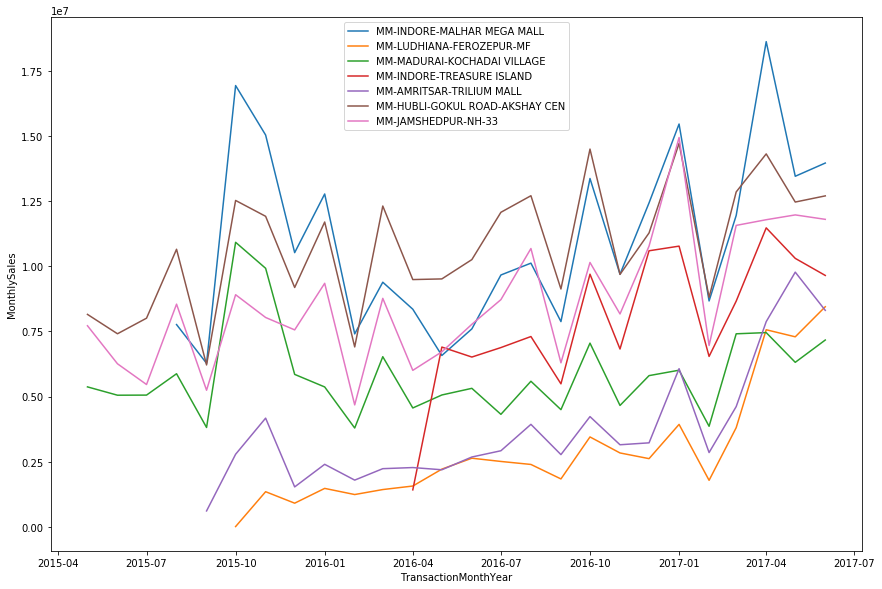

In [26]:
# OVERLAY ALL STORES'S CHARTS 

def TrendMonthlySales(txn_df):
    txn_store_df = txn_df 
        
    txn_store_df['TransactionMonthYear'] = txn_store_df.transactionDate.apply(lambda x: x.strftime("%b-%y"))

    txn_store_df['TransactionMonthYear'] = pd.to_datetime(txn_store_df.TransactionMonthYear, format = '%b-%y')
        
    txn_withMonthName_df = txn_store_df
    
    Sales_by_Month_df = txn_withMonthName_df.groupby(['store_description','TransactionMonthYear'])['payment_amount_by_tender'].sum().to_frame().reset_index()
    Sales_by_Month_df.rename({'payment_amount_by_tender':'MonthlySales'}, axis=1, inplace=True)

    '''MonYear_df = pd.DataFrame(cust_count_by_Month_df.reset_index().TransactionMonthYear.unique())
    MonYear_df.columns = ['MonYear']
    MonYear_df.sort_values('MonYear', inplace=True)
    MonYear_df.head(5)'''

    fig, ax = plt.subplots()

    fig.set_size_inches(12, 8)
    fig.tight_layout()

    for store in GetListOfStores(txn_df):
        Store_Sales_by_Month_df = Sales_by_Month_df[Sales_by_Month_df['store_description'] == store]
        ax.plot(Store_Sales_by_Month_df['TransactionMonthYear'], Store_Sales_by_Month_df['MonthlySales'], label=store)
        ax.set_xlabel('TransactionMonthYear')
        ax.set_ylabel('MonthlySales')
        #ax.set_title(str(xax+" and "+yax))
        #ax.set_yticks(df[xax])
        #ax.set_yticklabels(df[xax])
        ax.legend()
    plt.show()
    
TrendMonthlySales(txn_df)

In [27]:
## Number of unique customers and sales amount end to end - monthwise

import numpy as np

def EndToEndCustomersAndSalesMonthlyLevel(txn_df, store="ALL"):
    txn_df['transactionDate'] = pd.to_datetime(txn_df.transactionDate, format = '%Y-%m-%d')
    
    if (store == "ALL"):
        txn_store_df = txn_df
    else:
        txn_store_df = txn_df[txn_df.store_description == str(store)]
        
    txn_store_df['TransactionMonthYear'] = txn_store_df.transactionDate.apply(lambda x: x.strftime("%b-%y"))

    txn_store_df['TransactionMonthYear'] = pd.to_datetime(txn_store_df.TransactionMonthYear, format = '%b-%y')
        
    txn_withMonthName_df = txn_store_df
    #print(txn_withMonthName_df.head(5))
    
    cust_count_by_Month_df = txn_withMonthName_df.groupby(['TransactionMonthYear'])['customerID'].count().to_frame()
    cust_count_by_Month_df.rename({'customerID':'TotalCustomers'}, axis=1, inplace=True)

    cust_count_by_Month_df = cust_count_by_Month_df.merge(txn_withMonthName_df.groupby(['TransactionMonthYear'])['customerID'].nunique().to_frame(), on="TransactionMonthYear")
    cust_count_by_Month_df.rename({'customerID':'UniqueCustomers'}, axis=1, inplace=True)
    cust_count_by_Month_df = cust_count_by_Month_df.reset_index()
    
    # Mon-Year is not sorted in chronological order. TBD
    cust_count_by_Month_df.sort_values(by='TransactionMonthYear', ascending = "True", inplace=True)
    
    #print(cust_count_by_Month_df.head(50))

    sales_cust_count_by_Month_df = cust_count_by_Month_df.merge(txn_withMonthName_df.groupby(['TransactionMonthYear'])['payment_amount_by_tender'].sum().to_frame(), on="TransactionMonthYear")
    sales_cust_count_by_Month_df.rename({'payment_amount_by_tender':'SaleAmountRs'}, axis=1, inplace=True)

    sales_cust_count_by_Month_df = sales_cust_count_by_Month_df.sort_values('TransactionMonthYear', 
                                                                          ascending=False)
    #print(sales_cust_count_by_Month_df.head(50))
    
    # Sales Amount Across Months in the duration
    sales_cust_count_by_Month_df = sales_cust_count_by_Month_df.sort_values('TransactionMonthYear', 
                                                                          ascending=False)
    
    sales_cust_count_by_Month_df.plot.line(x='TransactionMonthYear', 
                                           y='UniqueCustomers',
                                           figsize=(10,6), 
                                           title="Monthly No. of UniqueCustomers for the store(s): "+store + "; Mean: "+str(np.round(np.mean(sales_cust_count_by_Month_df.UniqueCustomers),0))+ "; stdev: "+str(np.round(np.std(sales_cust_count_by_Month_df.UniqueCustomers),0)))
    sales_cust_count_by_Month_df.plot.line(x='TransactionMonthYear', 
                                           y='SaleAmountRs',
                                           figsize=(10,6), 
                                           title="Monthly Sales for the store(s): "+store + "; Mean: "+str(np.round(np.mean(sales_cust_count_by_Month_df.SaleAmountRs),0))+ "; stdev: "+str(np.round(np.std(sales_cust_count_by_Month_df.SaleAmountRs),0)))


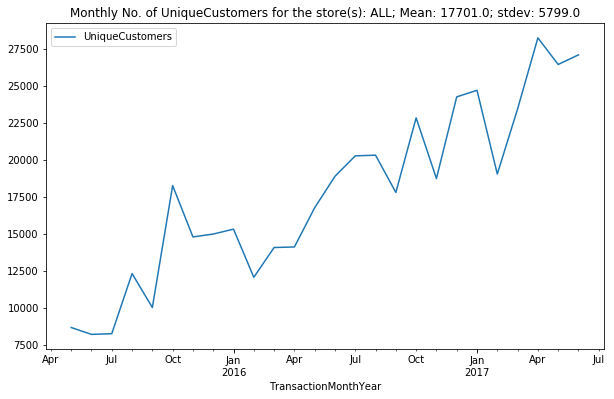

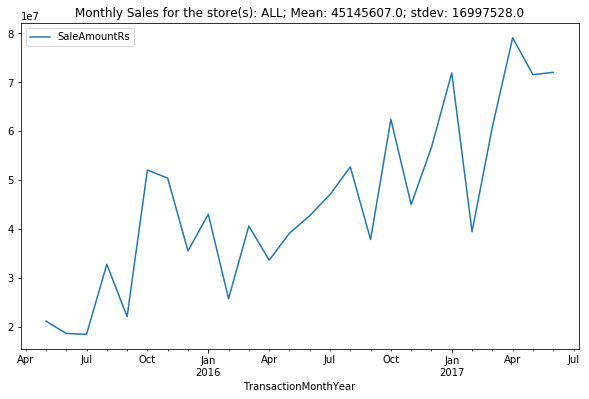

In [28]:
# Monthly level customers and sales for all stores combined
EndToEndCustomersAndSalesMonthlyLevel(txn_df)

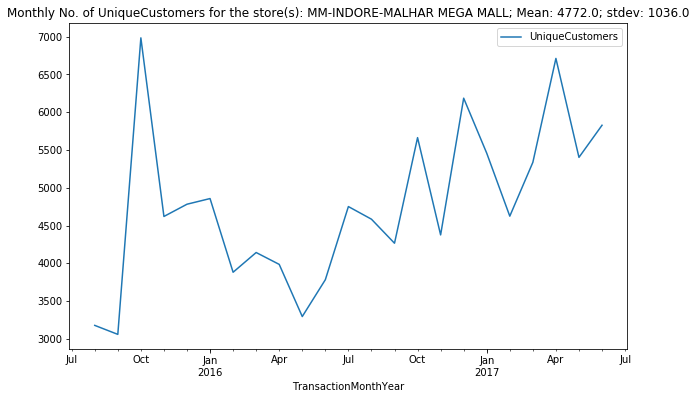

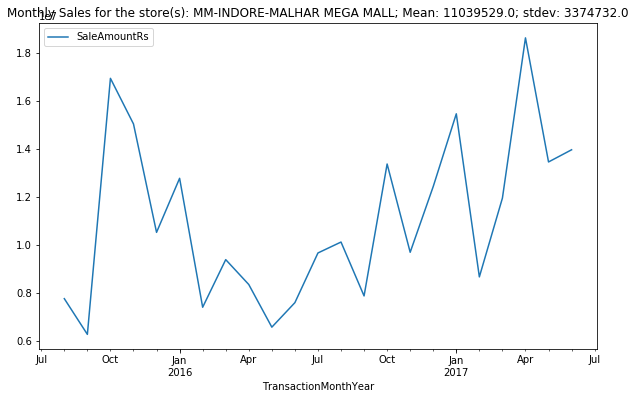

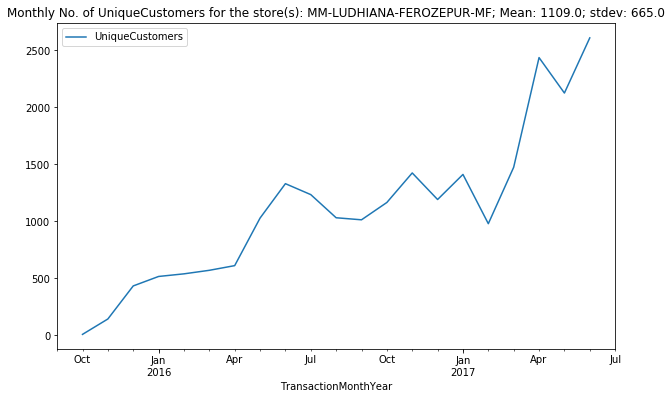

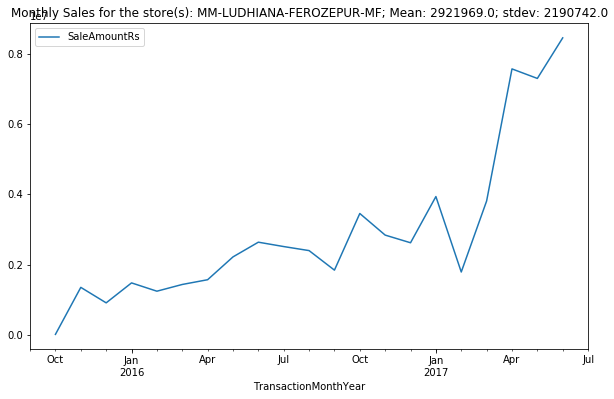

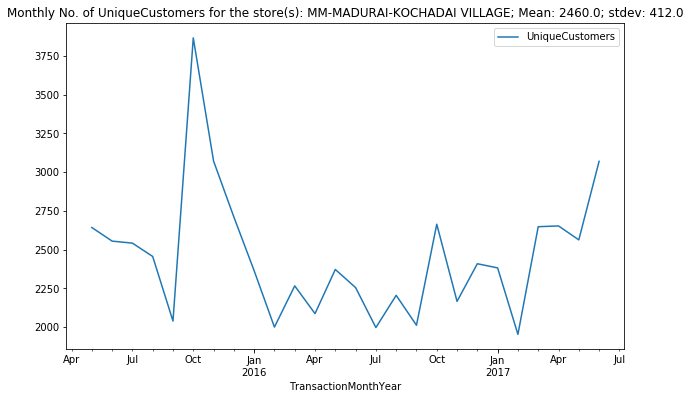

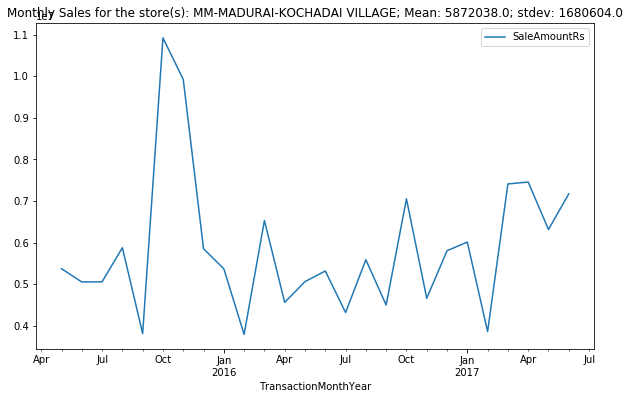

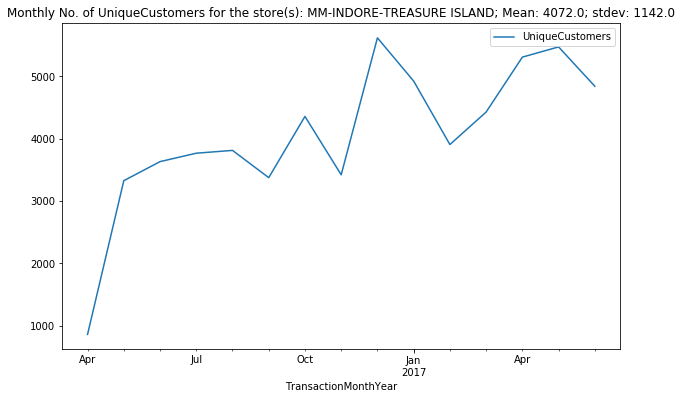

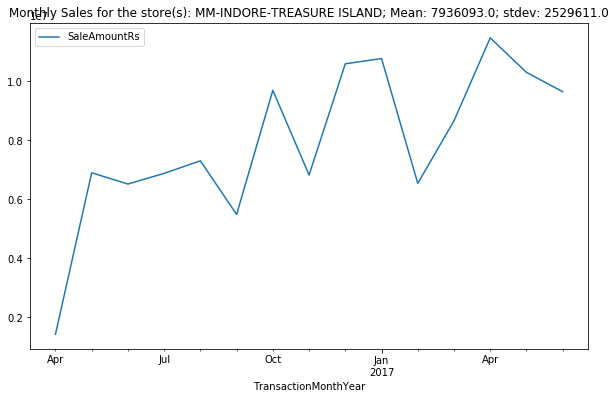

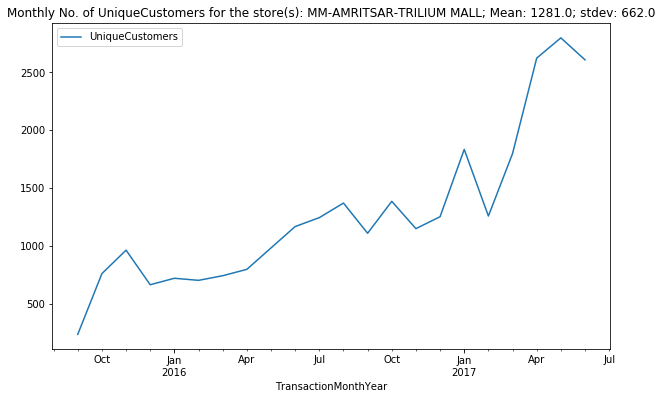

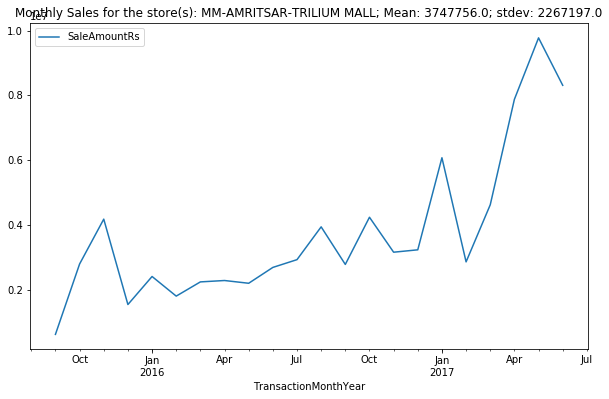

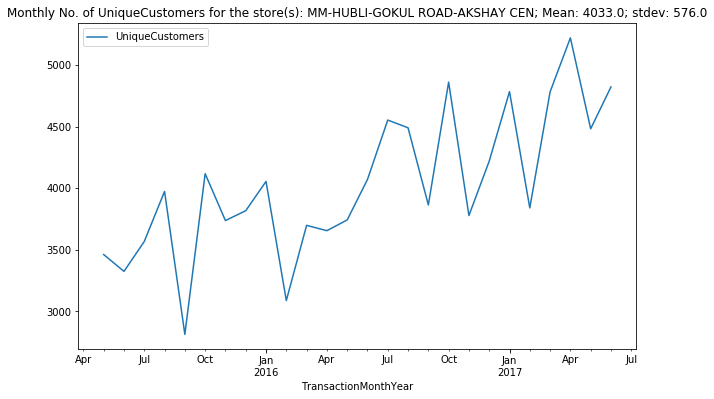

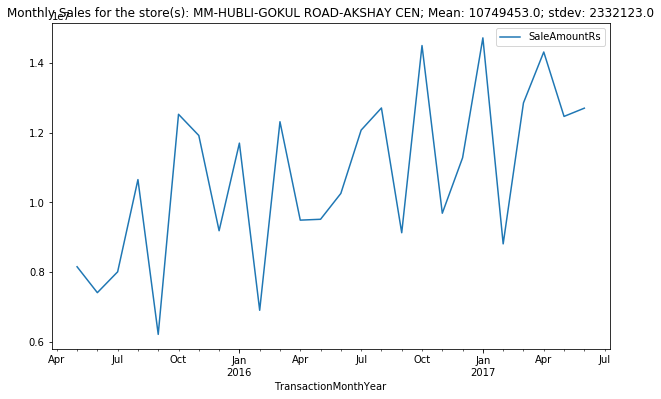

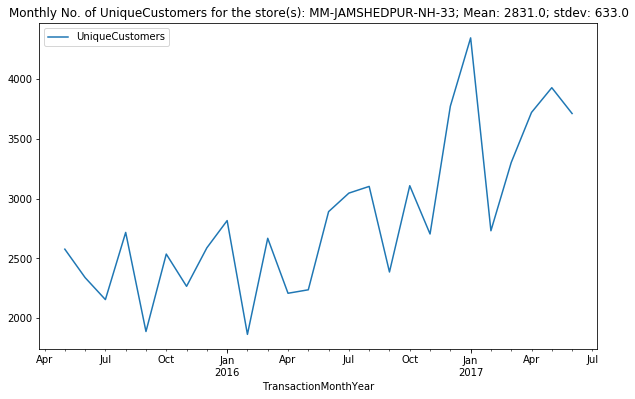

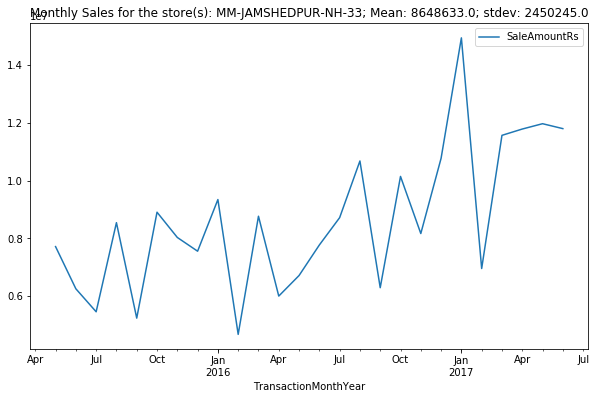

In [29]:
# Monthly level customers and sales for the stores separately
for i in GetListOfStores(txn_df):
    EndToEndCustomersAndSalesMonthlyLevel(txn_df,i)

# End to end Number of unique customers and sales amount - daywise

In [30]:
# Number of unique customers and sales amount end to end - monthwise

def EndToEndCustomersAndSalesDailyLevel(txn_df, store="ALL"):
    txn_df['transactionDate'] = pd.to_datetime(txn_df.transactionDate, format = '%Y-%m-%d')
    
    if (store == "ALL"):
        txn_store_df = txn_df
    else:
        txn_store_df = txn_df[txn_df.store_description == str(store)]
                
    txn_withMonthName_df = txn_store_df
    #print(txn_withMonthName_df.head(5))
    
    cust_count_by_Month_df = txn_withMonthName_df.groupby(['transactionDate'])['customerID'].count().to_frame()
    cust_count_by_Month_df.rename({'customerID':'TotalCustomers'}, axis=1, inplace=True)

    cust_count_by_Month_df = cust_count_by_Month_df.merge(txn_withMonthName_df.groupby(['transactionDate'])['customerID'].nunique().to_frame(), on="transactionDate")
    cust_count_by_Month_df.rename({'customerID':'UniqueCustomers'}, axis=1, inplace=True)
    cust_count_by_Month_df = cust_count_by_Month_df.reset_index()
    
    # Mon-Year is not sorted in chronological order. TBD
    cust_count_by_Month_df.sort_values(by='transactionDate', ascending = "True", inplace=True)
    
    #print(cust_count_by_Month_df.head(50))

    sales_cust_count_by_Month_df = cust_count_by_Month_df.merge(txn_withMonthName_df.groupby(['transactionDate'])['payment_amount_by_tender'].sum().to_frame(), on="transactionDate")
    sales_cust_count_by_Month_df.rename({'payment_amount_by_tender':'SaleAmountRs'}, axis=1, inplace=True)

    sales_cust_count_by_Month_df = sales_cust_count_by_Month_df.sort_values('transactionDate', 
                                                                          ascending=False)
    #print(sales_cust_count_by_Month_df.head(50))
    
    # Sales Amount Across Months in the duration
    sales_cust_count_by_Month_df = sales_cust_count_by_Month_df.sort_values('transactionDate', 
                                                                          ascending=False)
    
    sales_cust_count_by_Month_df.plot.line(x='transactionDate', 
                                           y='UniqueCustomers',
                                           figsize=(10,6), 
                                           title="Daily Number of UniqueCustomers for store(s): "+store + "; Mean: "+str(np.round(np.mean(sales_cust_count_by_Month_df.UniqueCustomers),0))+ "; stdev: "+str(np.round(np.std(sales_cust_count_by_Month_df.UniqueCustomers),0)))
    sales_cust_count_by_Month_df.plot.line(x='transactionDate', 
                                           y='SaleAmountRs',
                                           figsize=(10,6), 
                                           title="Daily Sales Amount for store(s): "+store + "; Mean: "+str(np.round(np.mean(sales_cust_count_by_Month_df.SaleAmountRs),0))+ "; stdev: "+str(np.round(np.std(sales_cust_count_by_Month_df.SaleAmountRs),0)))

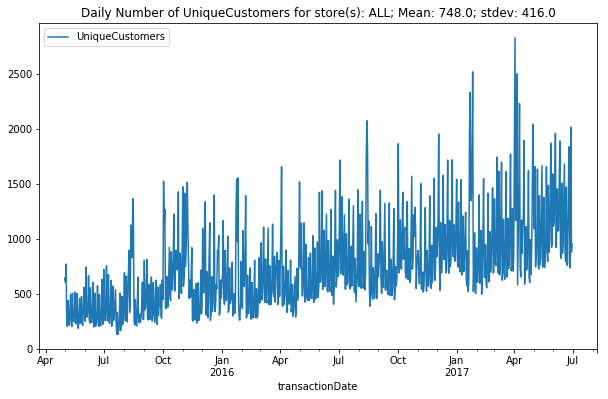

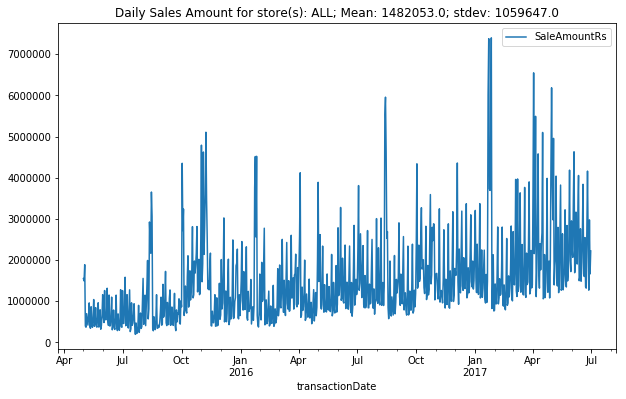

In [31]:
# Daily level customers and sales for all stores combined
EndToEndCustomersAndSalesDailyLevel(txn_df)

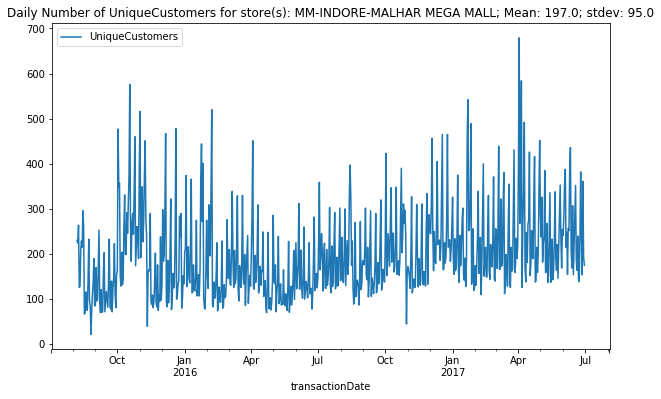

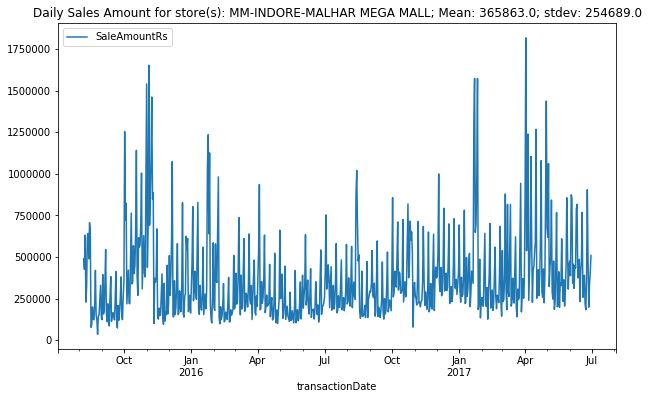

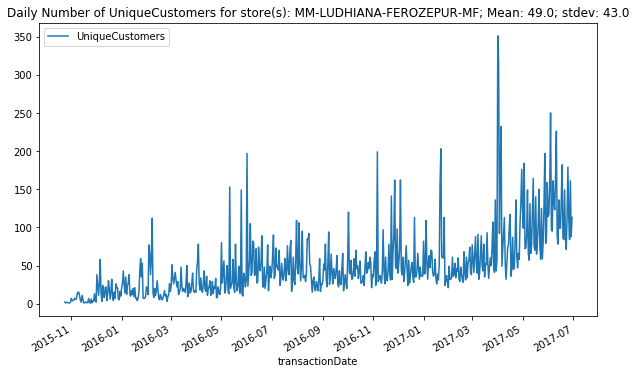

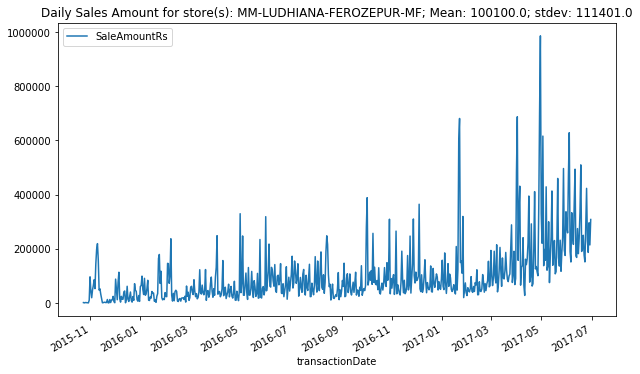

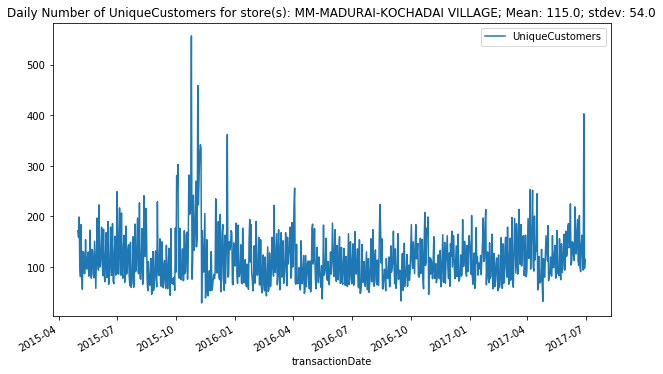

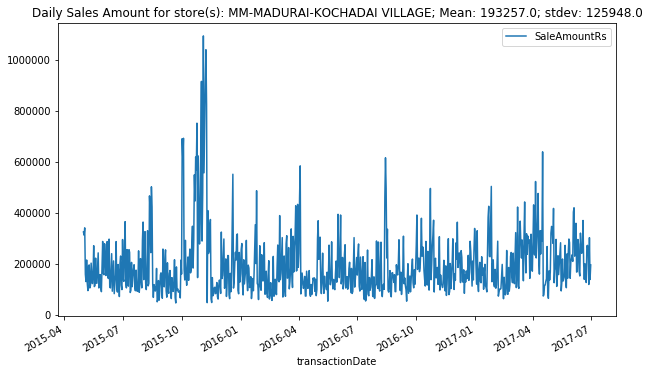

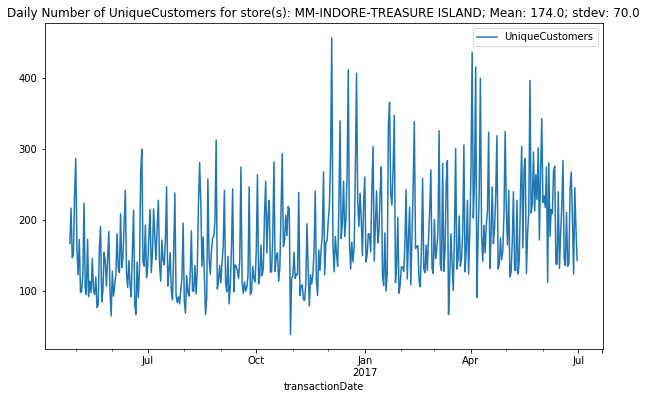

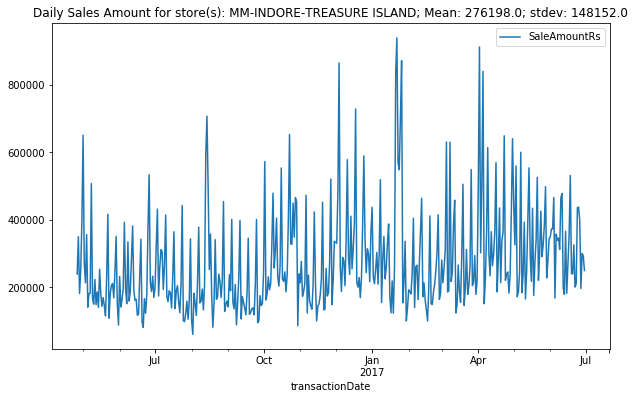

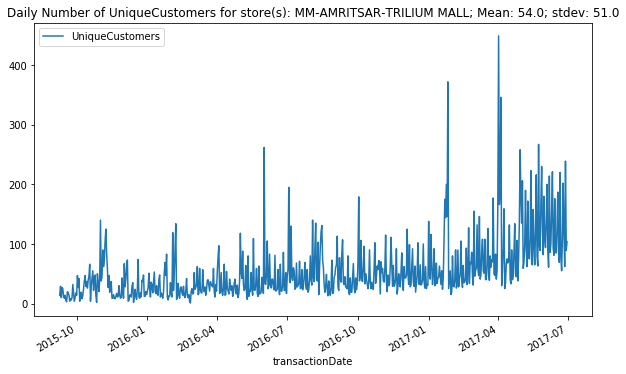

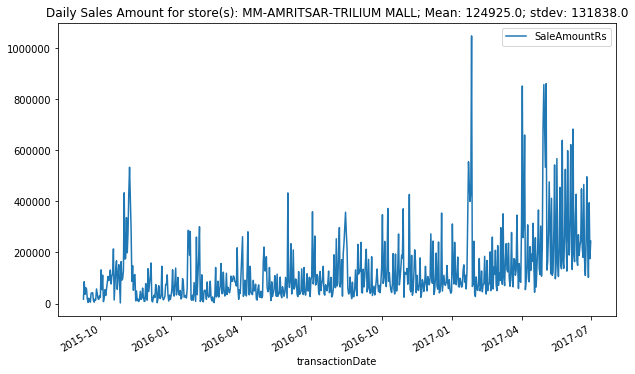

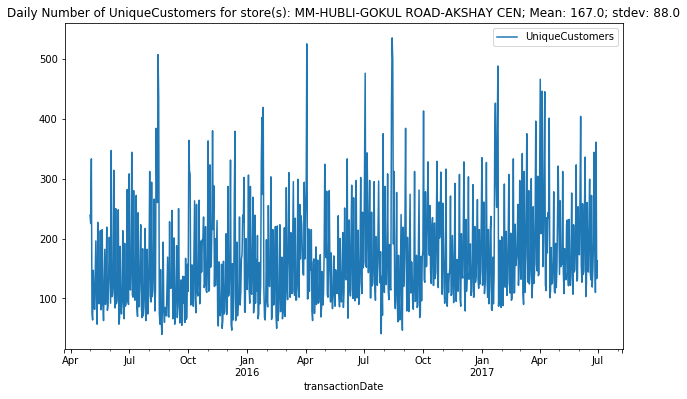

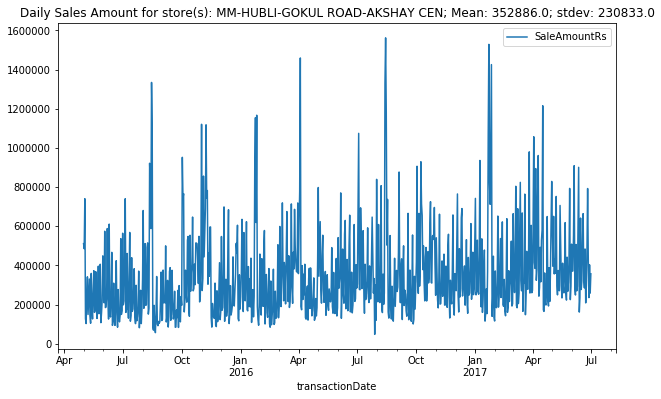

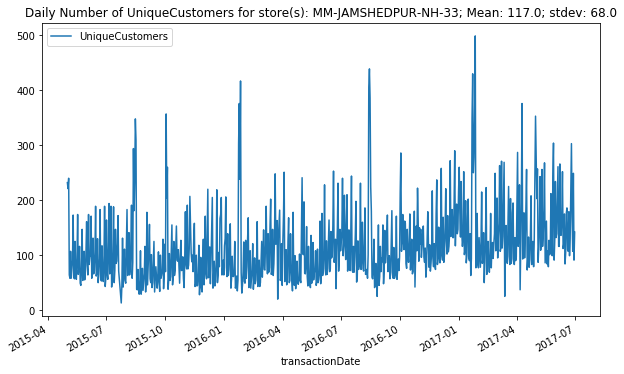

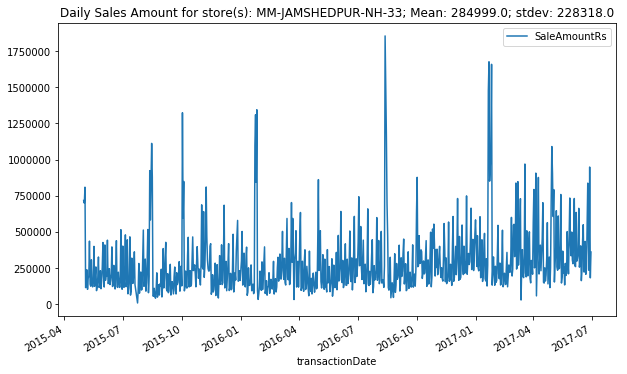

In [32]:
# Dailly level customers and sales for the stores separately
for i in GetListOfStores(txn_df):
    EndToEndCustomersAndSalesDailyLevel(txn_df,i)

# Number of unique customers and sales amount end to end - weekdays

In [33]:
import calendar
import matplotlib.pyplot as plt

def CustomersAndSalesWeekDays(txn_df, store="ALL"):
    txn_df['transactionDate'] = pd.to_datetime(txn_df.transactionDate, format = '%Y-%m-%d')
    
    if (store == "ALL"):
        txn_store_df = txn_df
    else:
        txn_store_df = txn_df[txn_df.store_description == str(store)]        

    txn_store_df['TransactionDay'] = txn_store_df.transactionDate.apply(lambda x: calendar.day_name[x.weekday()]) 
    
    cust_count_by_day_df = txn_store_df.groupby(['TransactionDay'])['customerID'].count().to_frame()
    cust_count_by_day_df.rename({'customerID':'TotalCustomers'}, axis=1, inplace=True)

    cust_count_by_day_df = cust_count_by_day_df.merge(txn_store_df.groupby(['TransactionDay'])['customerID'].nunique().to_frame(), on="TransactionDay")
    cust_count_by_day_df.rename({'customerID':'UniqueCustomers'}, axis=1, inplace=True)
    cust_count_by_day_df = cust_count_by_day_df.reset_index()
    cust_count_by_day_df.sort_values(by='UniqueCustomers', ascending = "False", inplace=True)
    
    sales_cust_count_by_day_df = cust_count_by_day_df.merge(txn_store_df.groupby(['TransactionDay'])['payment_amount_by_tender'].sum().to_frame(), on="TransactionDay")
    sales_cust_count_by_day_df.rename({'payment_amount_by_tender':'SaleAmountRs'}, axis=1, inplace=True)

    day_uniquecustcount_dict = zip(cust_count_by_day_df['TransactionDay'],
                               cust_count_by_day_df['UniqueCustomers'])
    #cust_count_by_day_df[['TotalCustomers','UniqueCustomers']].to_dict()

    x2, y2 = zip(*day_uniquecustcount_dict) # unpack a list of pairs into two tuples
    fig, ax = plt.subplots()

    fig.set_size_inches(15,10)

    ax.barh(x2, y2, align='center')
    ax.invert_yaxis()  # labels read top-to-bottom
    ax.set_xlabel("No of unique customers")
    ax.set_ylabel('Day')
    ax.set_title('Customers across different days of the week for the store(s): '+store+"; Mean: "+str(np.round(np.mean(cust_count_by_day_df['UniqueCustomers']),0))+ "; stdev: "+str(np.round(np.std(cust_count_by_day_df['UniqueCustomers']),0)))
    for i, v in enumerate(y2):
        ax.text(v + 3, i + .25, str(round(v,0)))
    plt.show()

    day_uniquecustcount_dict = zip(sales_cust_count_by_day_df['TransactionDay'],
                               sales_cust_count_by_day_df['SaleAmountRs'])
    #cust_count_by_day_df[['TotalCustomers','UniqueCustomers']].to_dict()

    x2, y2 = zip(*day_uniquecustcount_dict) # unpack a list of pairs into two tuples
    fig, ax = plt.subplots()

    fig.set_size_inches(15,10)

    ax.barh(x2, y2, align='center')
    ax.invert_yaxis()  # labels read top-to-bottom
    ax.set_xlabel("Sales Amount in rupees")
    ax.set_ylabel('Day')
    ax.set_title("Sales Amount in rupees on different days of the week for the store(s): "+store+"; Mean: "+str(np.round(np.mean(sales_cust_count_by_day_df['SaleAmountRs']),0))+ "; stdev: "+str(np.round(np.std(sales_cust_count_by_day_df['SaleAmountRs']),0)))

    for i, v in enumerate(y2):
        ax.text(v + 3, i + .25, str(round(v,0)))
    plt.show()

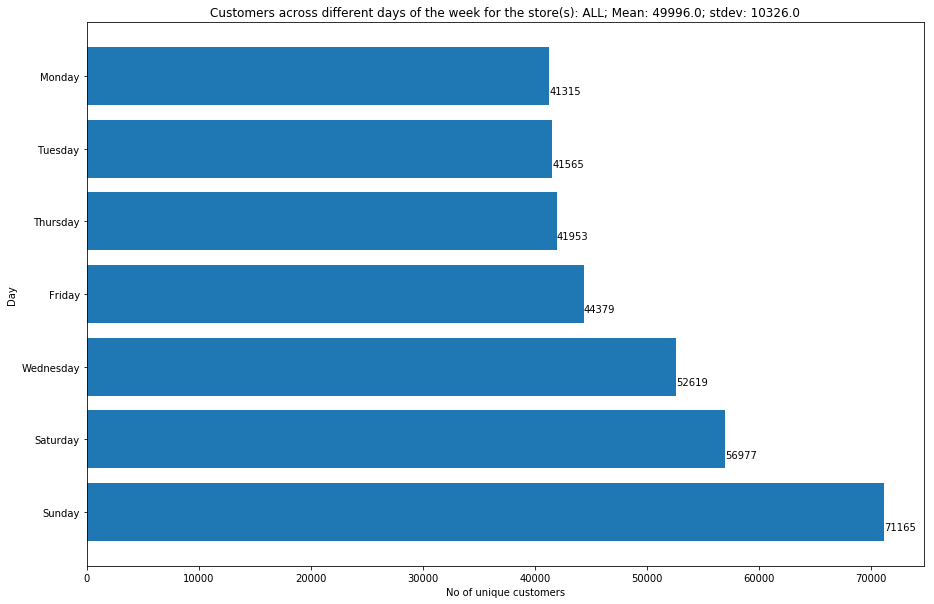

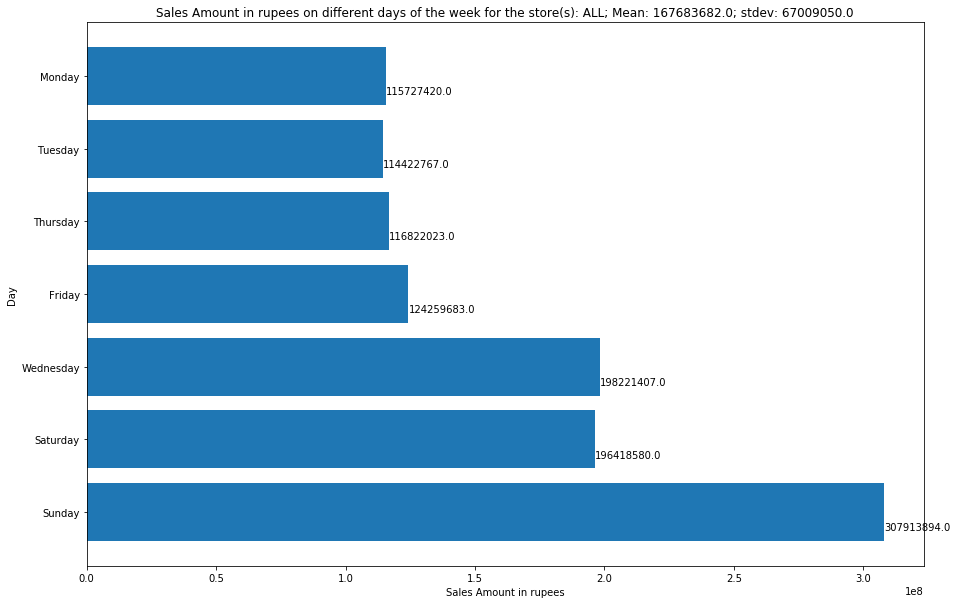

In [34]:
# Weekday wise customers and sales for ALL stores
CustomersAndSalesWeekDays(txn_df)

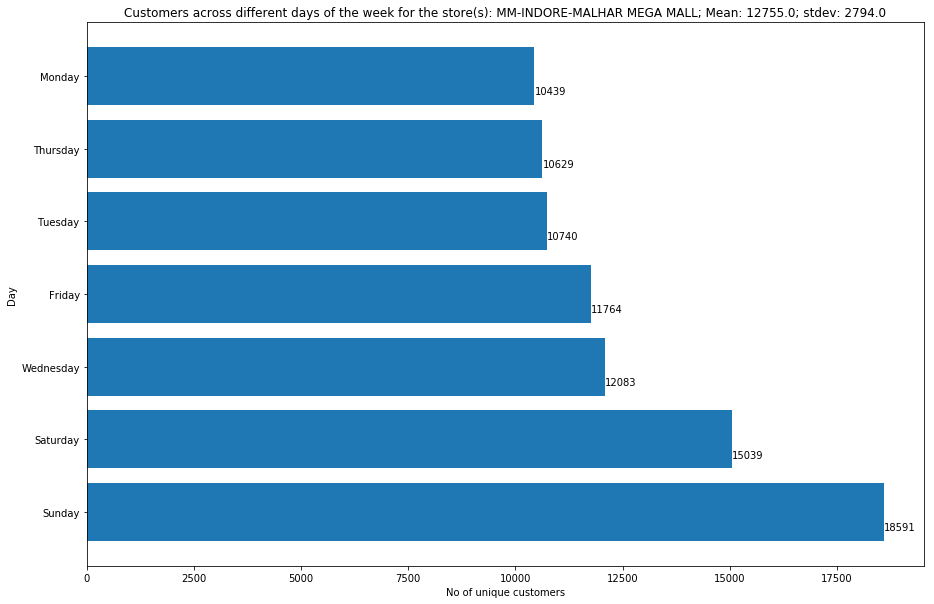

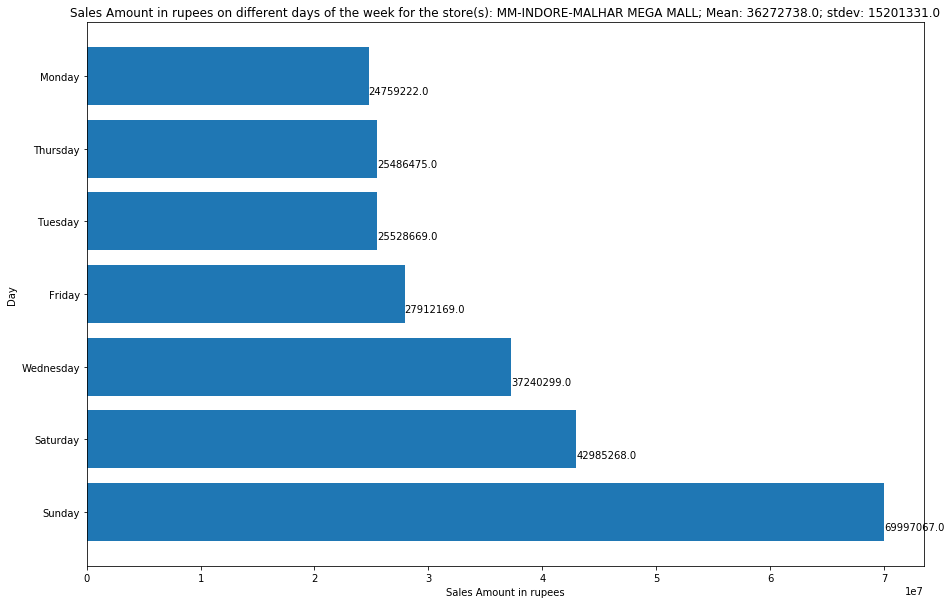

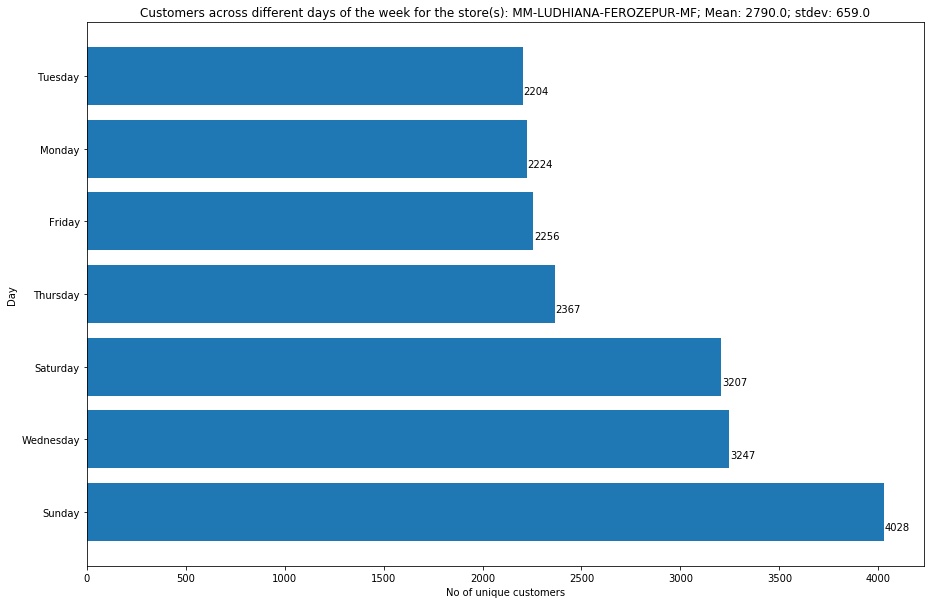

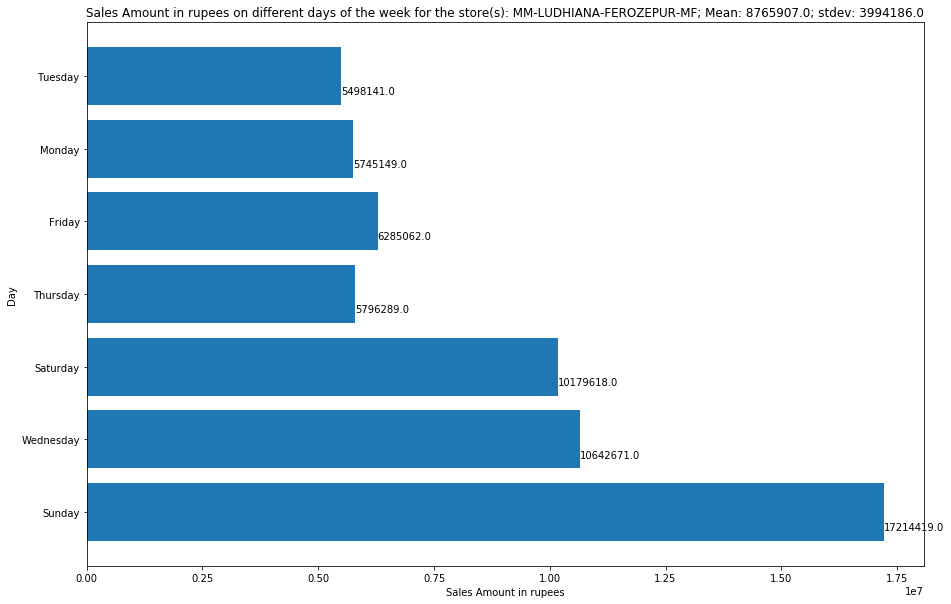

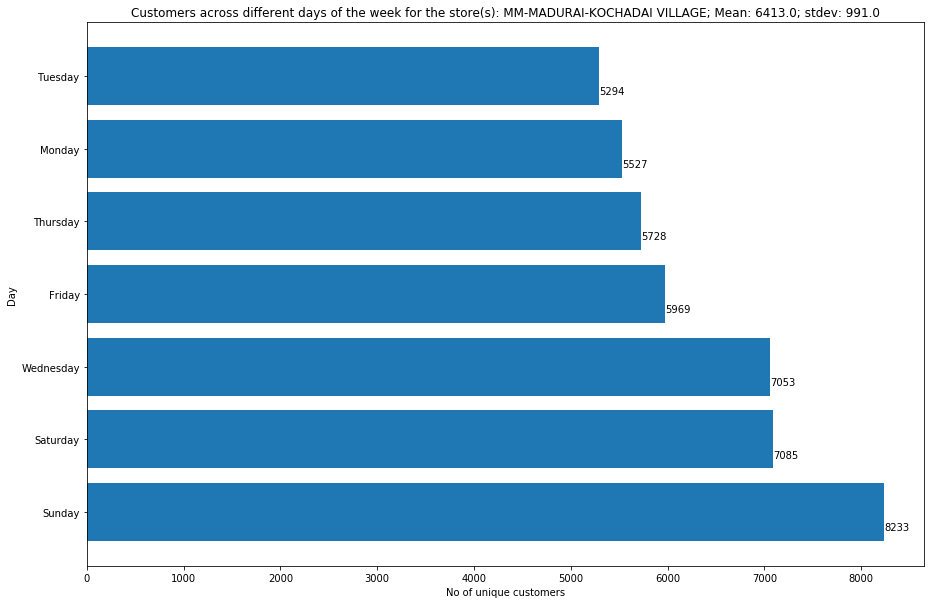

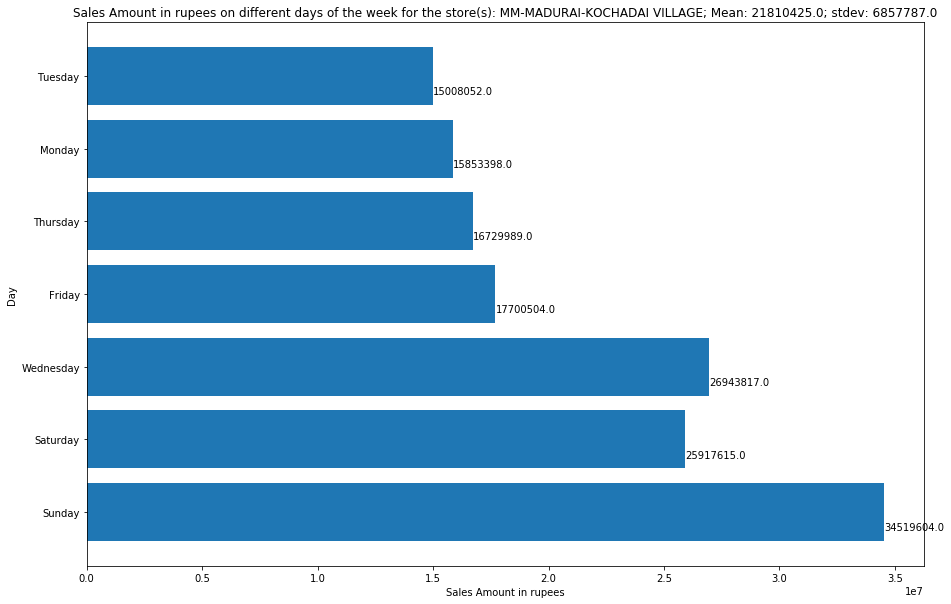

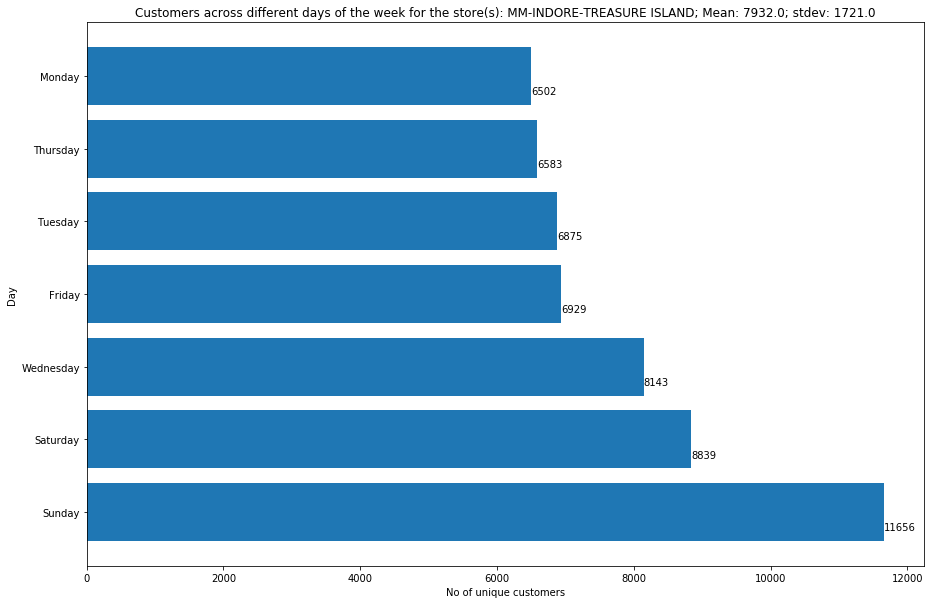

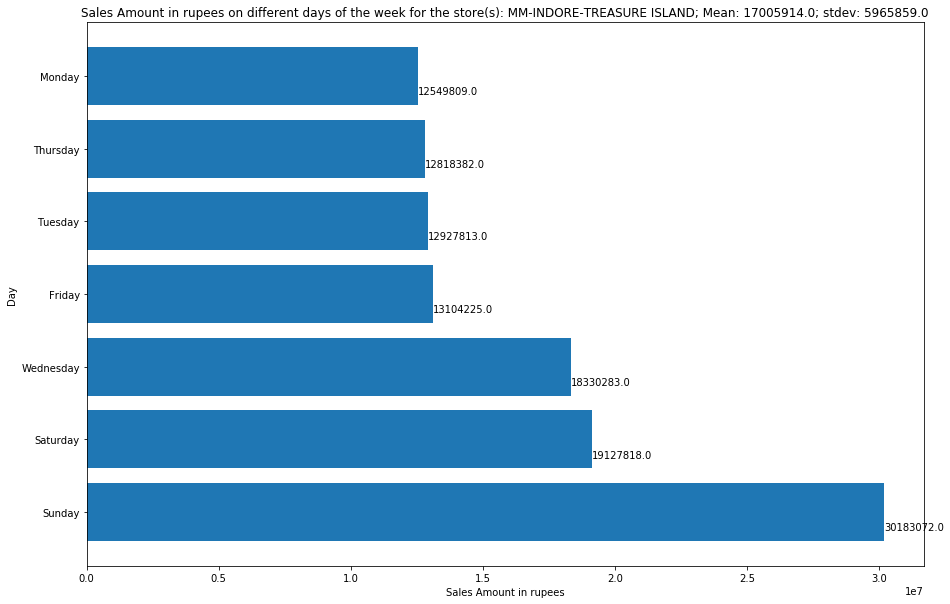

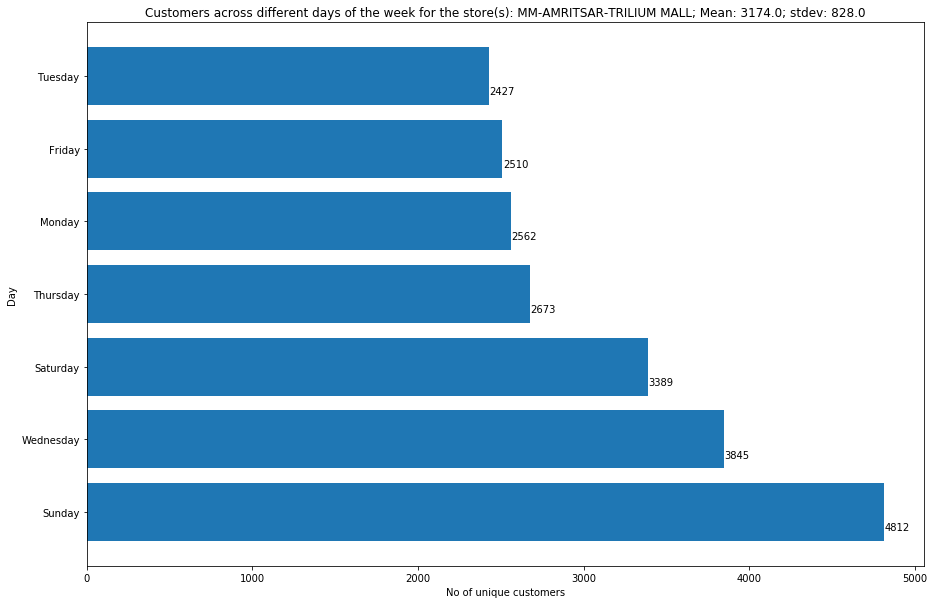

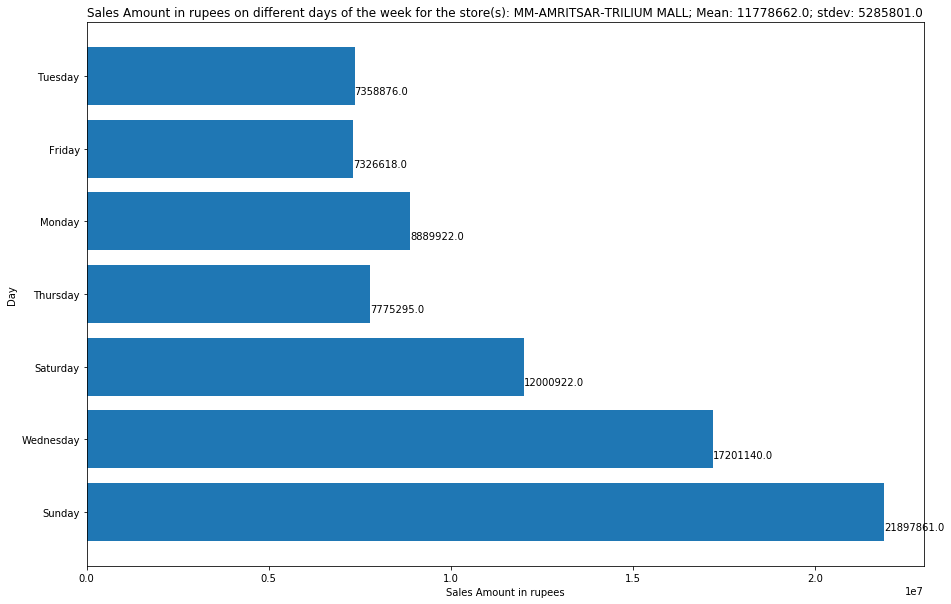

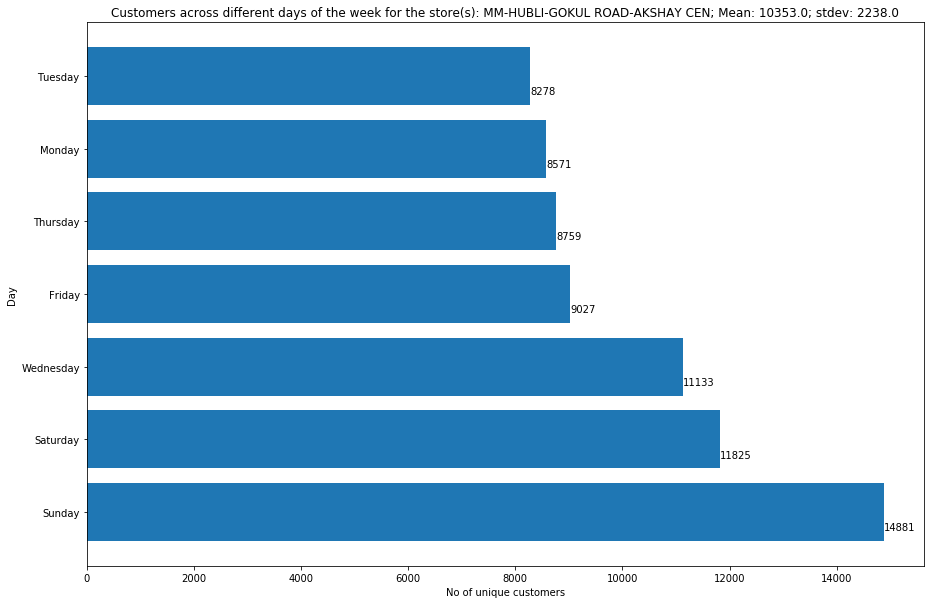

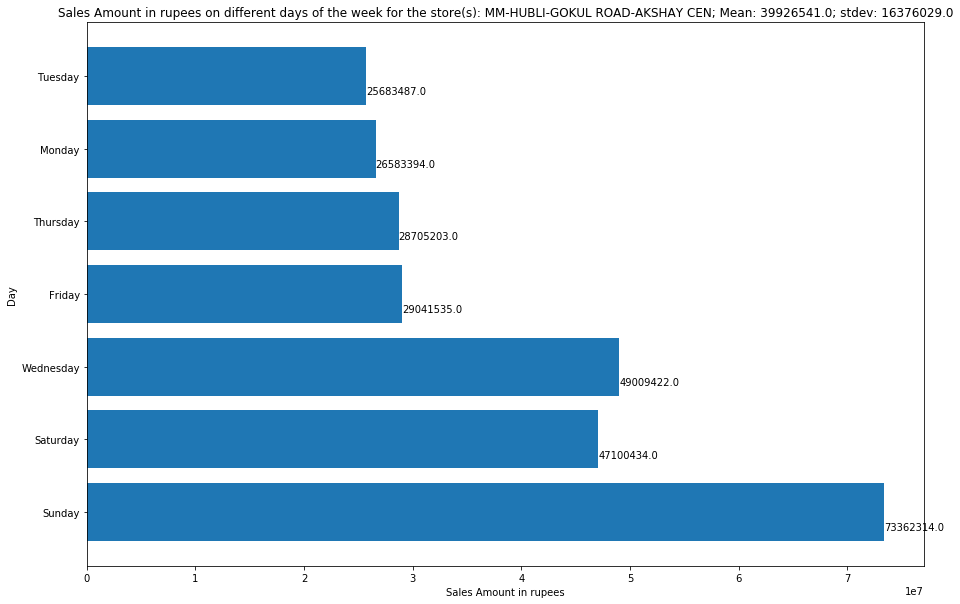

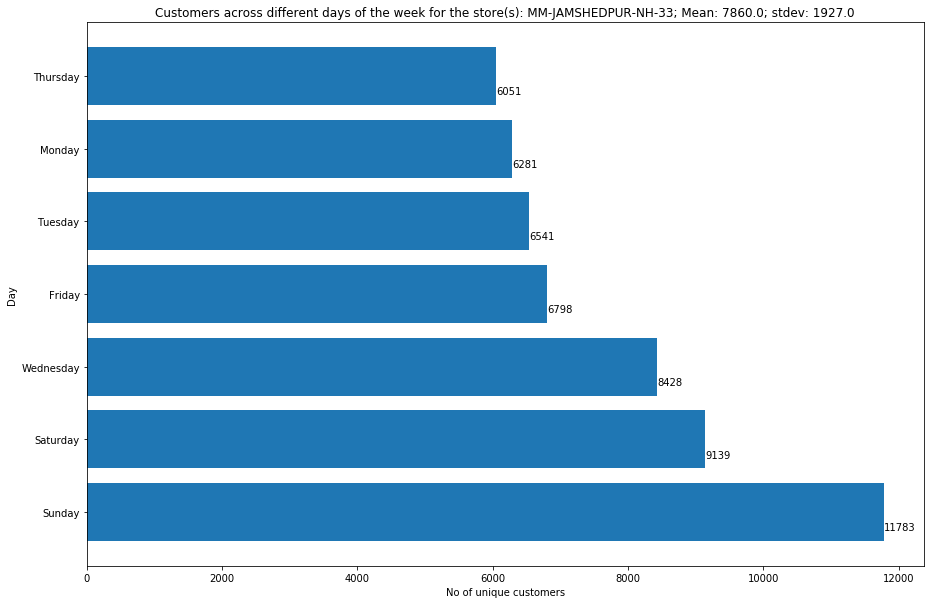

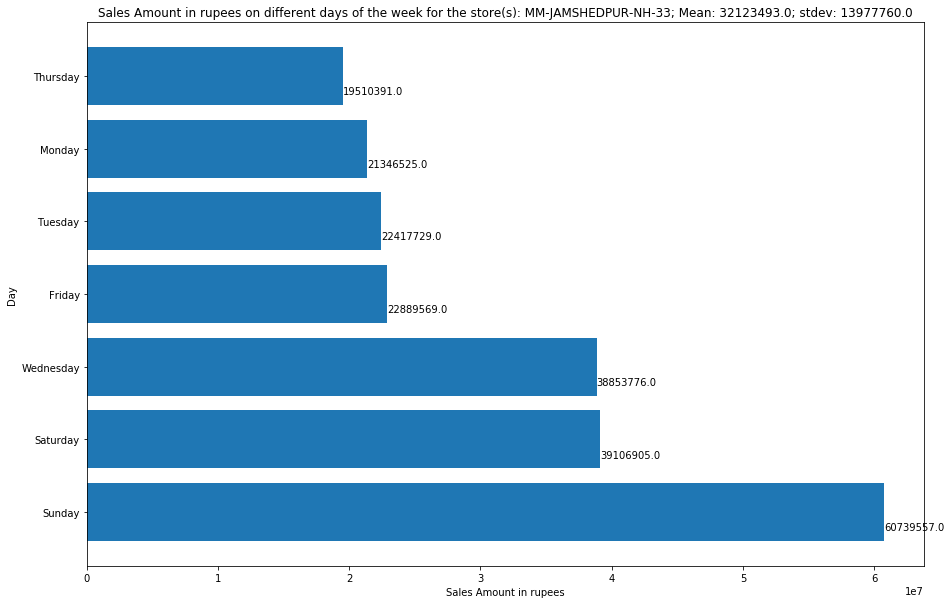

In [35]:
# Weekday wise customers and sales for ALL stores
for i in GetListOfStores(txn_df):
    CustomersAndSalesWeekDays(txn_df,i)

# Number of unique customers and sales amount end to end - days of month

In [36]:
import calendar
import matplotlib.pyplot as plt
import numpy as np

def CustomersAndSalesDaysOfMonth(txn_df, store="ALL"):
    
    txn_df['TransactionDayOfMonth'] = txn_df.transactionDate.apply(lambda x: x.day)
    
    if (store == "ALL"):
        txn_store_df = txn_df
    else:
        txn_store_df = txn_df[txn_df.store_description == str(store)]  
        
    cust_count_by_dayMon_df = txn_store_df.groupby(['TransactionDayOfMonth'])['customerID'].count().to_frame()
    cust_count_by_dayMon_df.rename({'customerID':'TotalCustomers'}, axis=1, inplace=True)

    cust_count_by_dayMon_df = cust_count_by_dayMon_df.merge(txn_store_df.groupby(['TransactionDayOfMonth'])['customerID'].nunique().to_frame(), on="TransactionDayOfMonth")
    cust_count_by_dayMon_df.rename({'customerID':'UniqueCustomers'}, axis=1, inplace=True)
    cust_count_by_dayMon_df = cust_count_by_dayMon_df.reset_index()
    cust_count_by_dayMon_df.sort_values(by='UniqueCustomers', ascending = "False", inplace=True)

    sales_cust_count_by_dayMon_df = cust_count_by_dayMon_df.merge(txn_store_df.groupby(['TransactionDayOfMonth'])['payment_amount_by_tender'].sum().to_frame(), on="TransactionDayOfMonth")
    sales_cust_count_by_dayMon_df.rename({'payment_amount_by_tender':'SaleAmountRs'}, axis=1, inplace=True)
    
    sales_cust_count_by_dayMon_df = sales_cust_count_by_dayMon_df.sort_values('UniqueCustomers', 
                                                                          ascending=False)
    #print(sales_cust_count_by_dayMon_df.head(5))
    ax = sales_cust_count_by_dayMon_df.plot(y='UniqueCustomers',
                                   x='TransactionDayOfMonth',
                                   figsize=(15,10),
                                   #color=['b'],
                                   kind='barh')

    ax.set_xlabel('Sales amount')
    ax.set_ylabel("Day of month")
    ax.set_title('Unique Customers across different days of the month for the store(s): '+store+"; Mean: "+str(np.round(np.mean(sales_cust_count_by_dayMon_df['UniqueCustomers']),0))+ "; stdev: "+str(np.round(np.std(sales_cust_count_by_dayMon_df['UniqueCustomers']),0)))
    ax.invert_yaxis()  # labels read top-to-bottom

    for i, v in enumerate(sales_cust_count_by_dayMon_df['UniqueCustomers']):
        ax.text(v + 3, i + .25, str(round(v,0)))
        
        
    sales_cust_count_by_dayMon_df = sales_cust_count_by_dayMon_df.sort_values('SaleAmountRs', 
                                                                          ascending=False)
    #print(sales_cust_count_by_dayMon_df.head(5))
    ax = sales_cust_count_by_dayMon_df.plot(y='SaleAmountRs',
                                   x='TransactionDayOfMonth',
                                   figsize=(15,10),
                                   color=['b'],
                                   kind='barh')

    ax.set_xlabel('Sales amount')
    ax.set_ylabel("Day of month")
    ax.set_title('Sales amount across different days of the month')
    ax.set_title('Sales amount across different days of the month for the store(s): '+store+"; Mean: "+str(np.round(np.mean(sales_cust_count_by_dayMon_df['SaleAmountRs']),0))+ "; stdev: "+str(np.round(np.std(sales_cust_count_by_dayMon_df['SaleAmountRs']),0)))

    ax.invert_yaxis()  # labels read top-to-bottom

    for i, v in enumerate(sales_cust_count_by_dayMon_df['SaleAmountRs']):
        ax.text(v + 3, i + .25, str(round(v,0)))

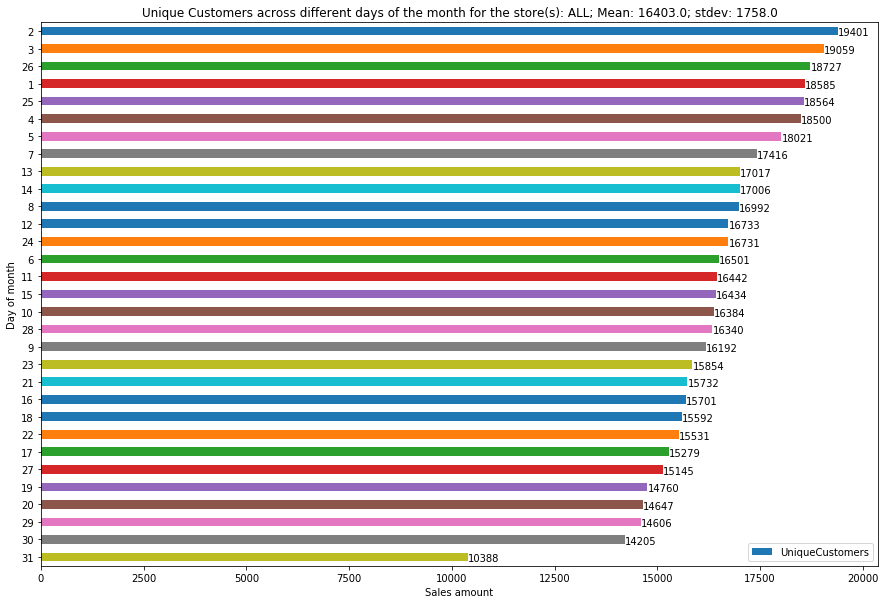

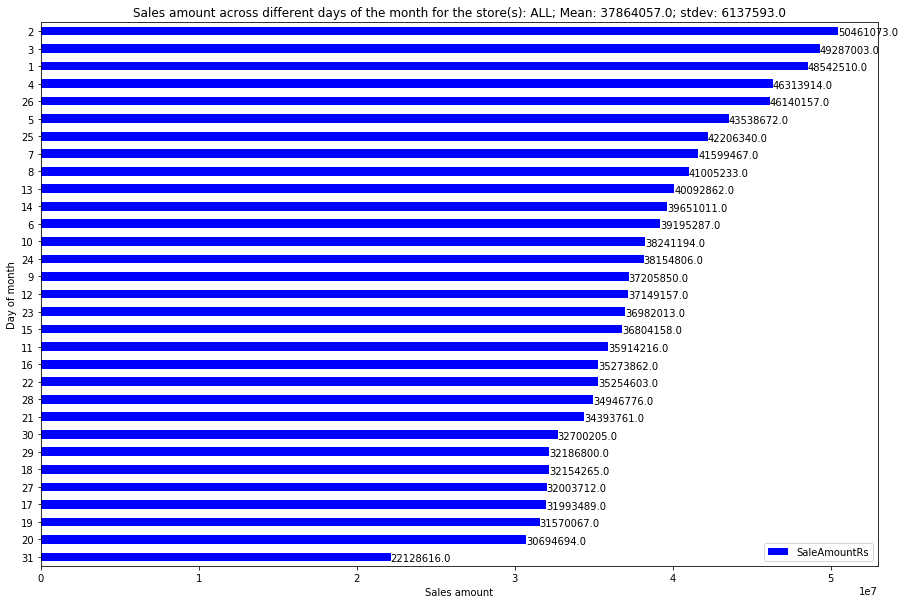

In [37]:
CustomersAndSalesDaysOfMonth(txn_df)

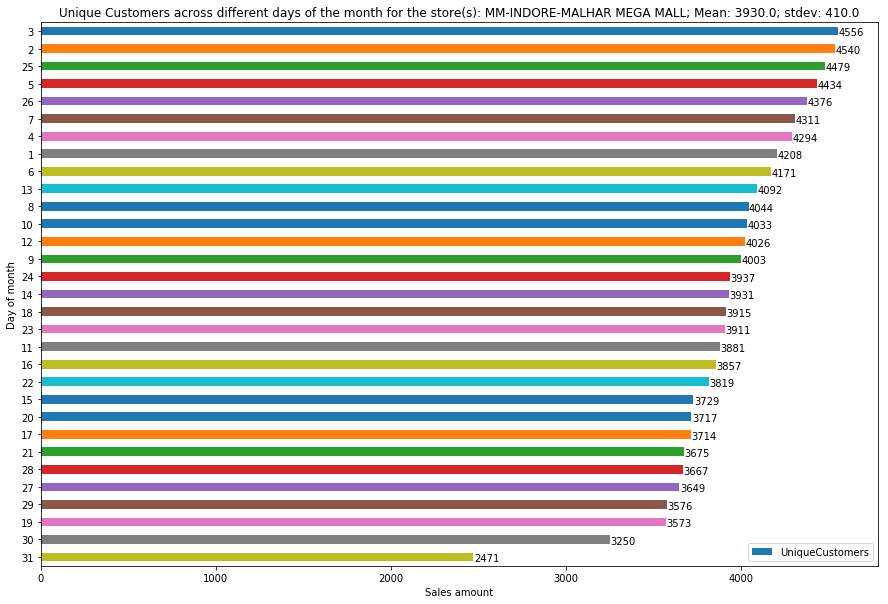

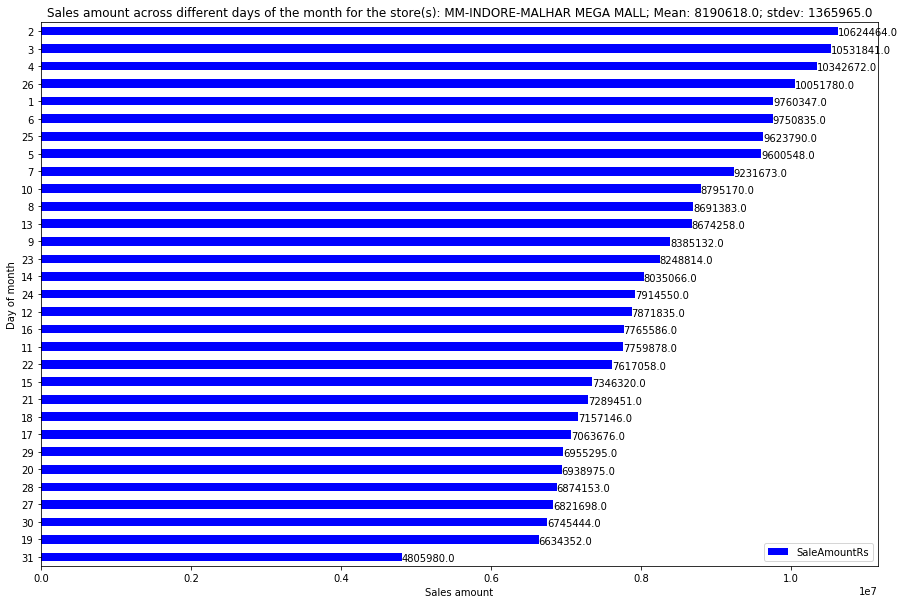

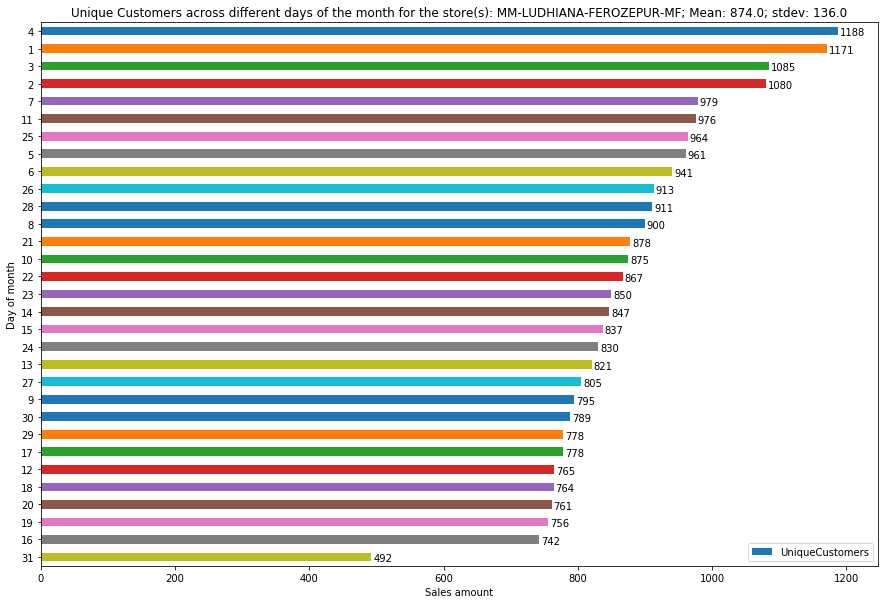

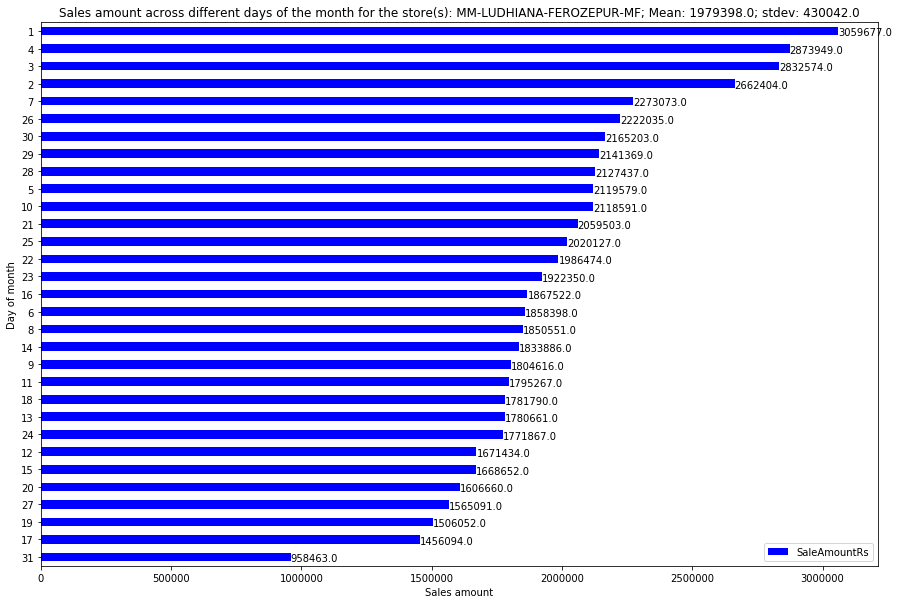

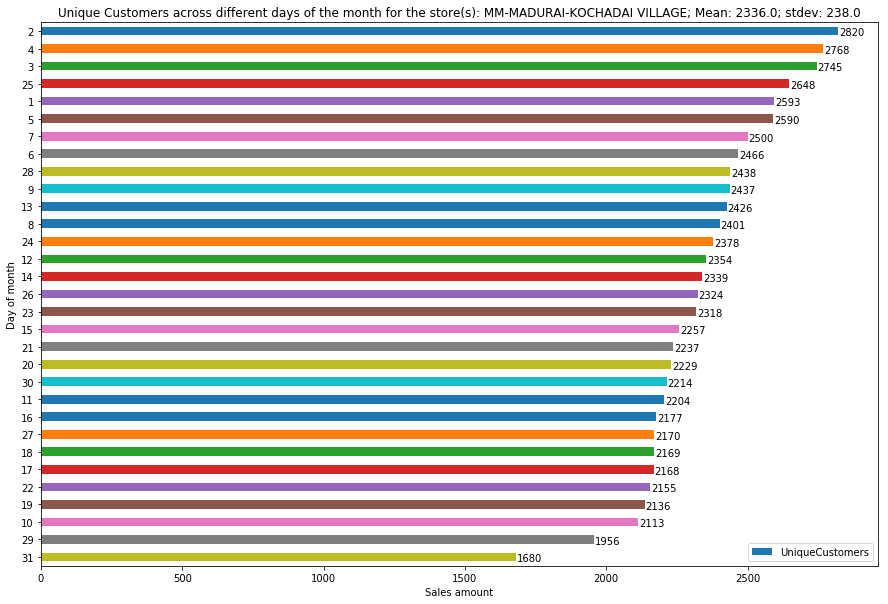

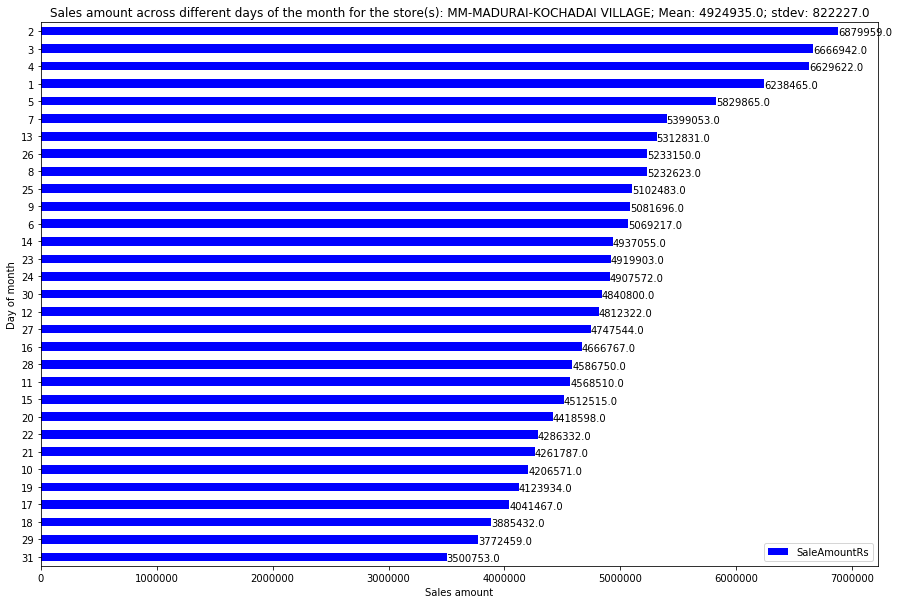

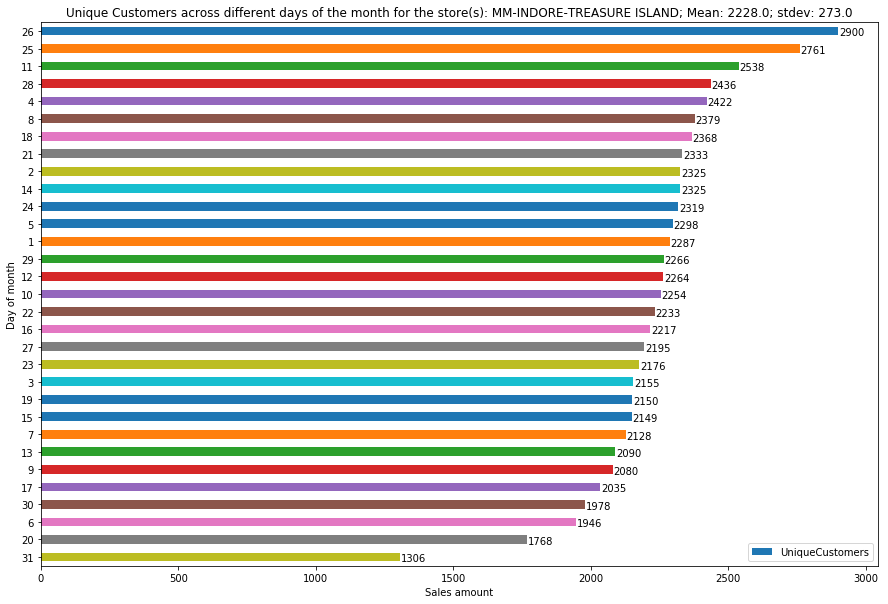

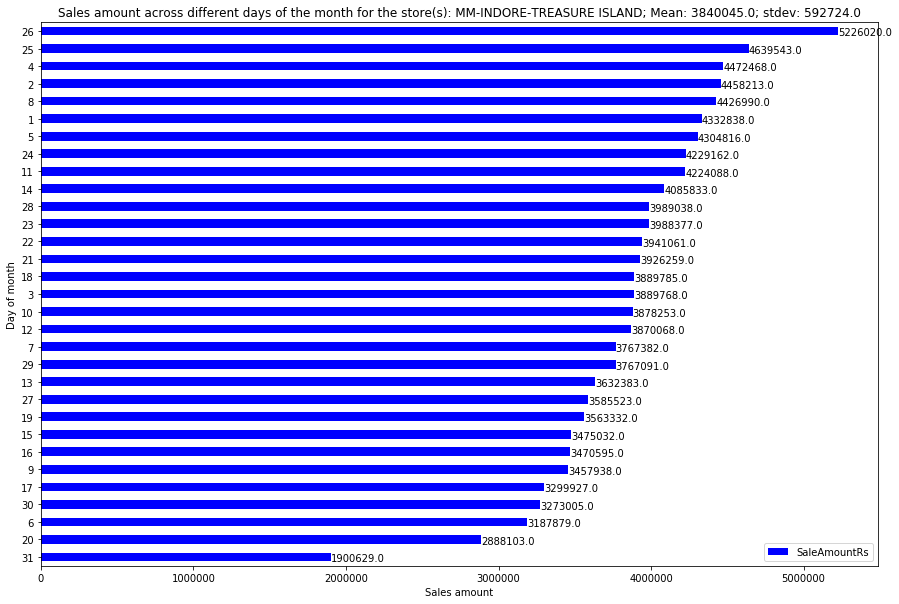

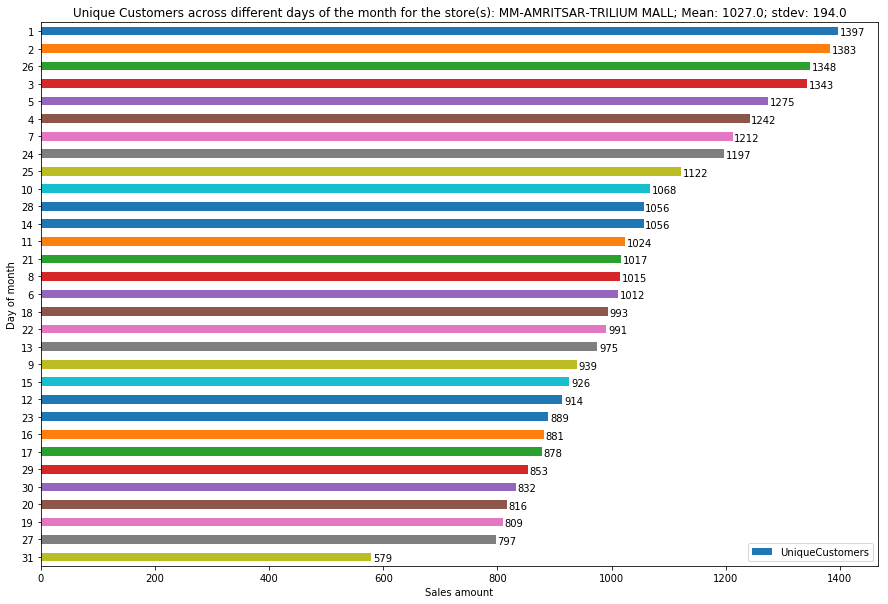

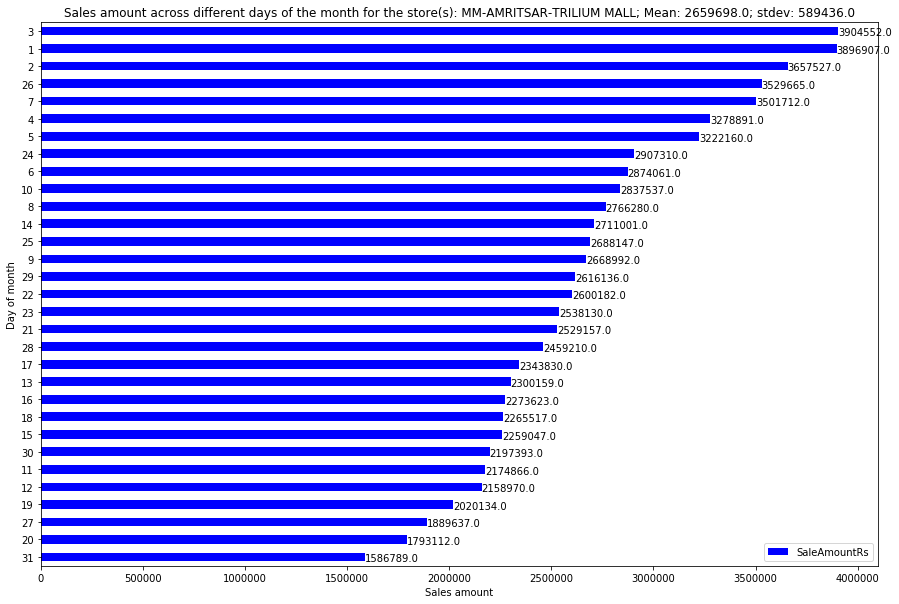

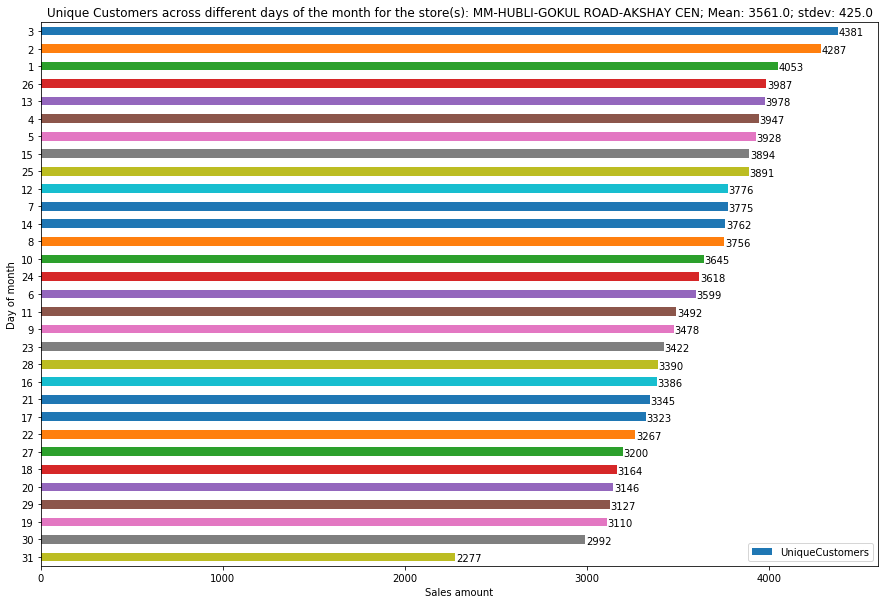

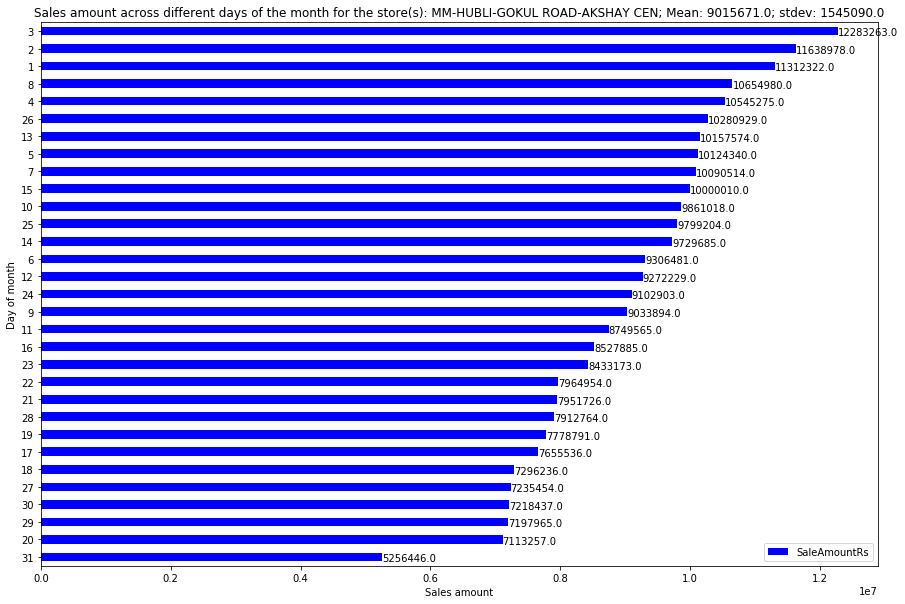

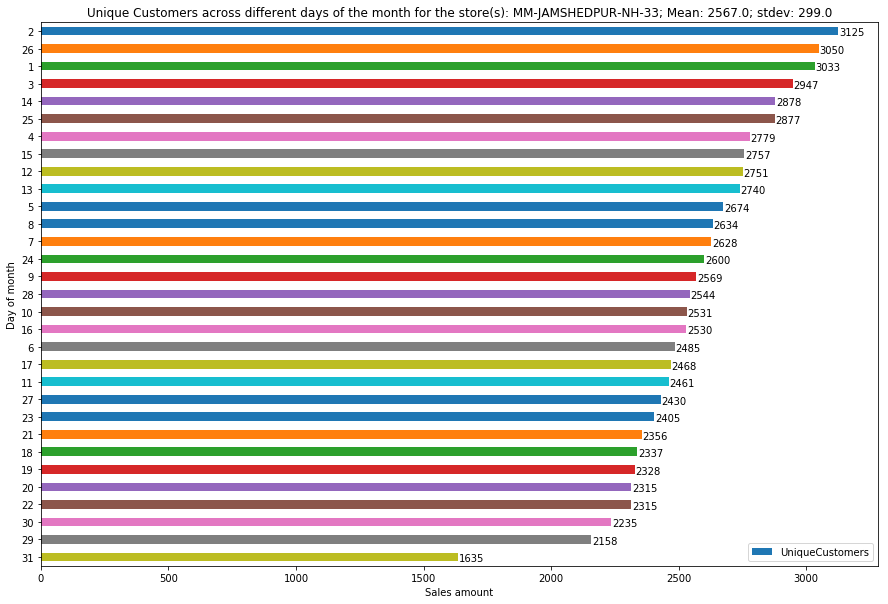

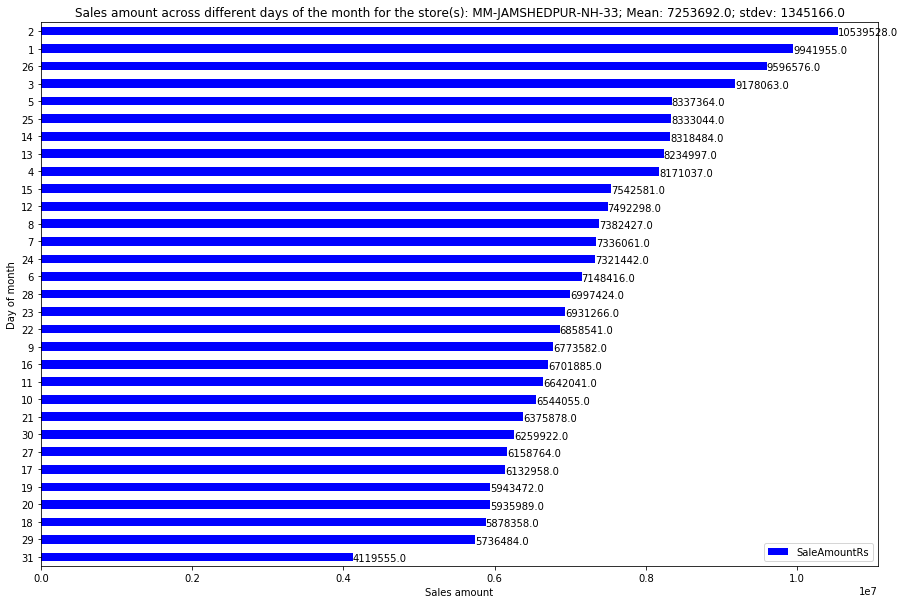

In [38]:
# Get the 
for i in GetListOfStores(txn_df):
    CustomersAndSalesDaysOfMonth(txn_df,i)

# Functions related to customer details

In [39]:
import numpy as np
from datetime import datetime
from datetime import date

def calculate_age(DateOfBirth):
    DateOfBirth = datetime.strptime(str(DateOfBirth), "%Y-%m-%d").date()
    today = date.today()
    return today.year - DateOfBirth.year - ((today.month, today.day) < (DateOfBirth.month, DateOfBirth.day))

def BuildCustomerDatabase(txn_df):

    # Drop rows if the customerID or DOB are empty of NANA
    txn_correct_DOB_df = txn_df[txn_df.DOB != "NANA"]
    txn_correct_DOB_df = txn_correct_DOB_df.dropna(axis=0, subset=['DOB','customerID'])

    # Get the age
    txn_correct_DOB_df['Age'] = txn_correct_DOB_df['DOB'].apply(calculate_age)   
    
    txn_correct_DOB_df['store_description'].value_counts().argmax()

    # Get frequently used store. Takes a lot of time to find. Need to optimize
    f = lambda x: np.nan if x.isnull().all() else x.value_counts().index[0]
    store_df = txn_correct_DOB_df.groupby('customerID')['store_description'].apply(f).reset_index()

    # Get frequently used payment method. Takes a lot of time to find. Need to optimize
    payment_df = txn_correct_DOB_df.groupby('customerID')['PaymentUsed'].apply(f).reset_index()

    # Get RFM for the customer ID and Cluster ID
    RFM_Cluster_df = pd.read_csv("BB_CustomerSegments_3Clusters_ML_18Mar/3ClustersRFM.csv")
    
    temp_df = txn_correct_DOB_df.merge(RFM_Cluster_df,on='customerID')
    
    customer_db_df = temp_df[['customerID', 'Age', 'Gender', 'Recency','Frequency','Monetary','ClusterLabel']].drop_duplicates()
    customer_db_df = customer_db_df.merge(store_df, on='customerID').merge(payment_df, on='customerID')    
    customer_db_df['AvgBillAmount'] = np.round(customer_db_df['Monetary']/customer_db_df['Frequency'],0)
    customer_db_df = customer_db_df.rename(columns={'PaymentUsed':'FreqPaymentMethod', 'store_description':'FreqUsedStore'})

    return(customer_db_df)

In [40]:
print("Building customer data base. Will take upto 10 minutes. Needs to be optimized")
customer_db_df = BuildCustomerDatabase(txn_df)

Building customer data base. Will take upto 10 minutes. Needs to be optimized


In [41]:
def ShowSpendingPattern(customerID, txn_df):
    cust_pay_df = txn_df[txn_df['customerID'] == customerID].groupby('transactionDate')['payment_amount_by_tender'].sum().to_frame().reset_index()
    cust_pay_df.plot.line(x='transactionDate', 
                      y='payment_amount_by_tender',
                      figsize=(10,6), 
                      title="Spending pattern for customer with id: "+str(customerID)+"; Mean: "+str(np.round(np.mean(cust_pay_df.payment_amount_by_tender),0))+ "; stdev: "+str(np.round(np.std(cust_pay_df.payment_amount_by_tender),0)))    


In [42]:
def ShowCustomerVisitingPattern(customerID, txn_df):
    txn_store_df = txn_df[txn_df.customerID == customerID]
    txn_store_df['TransactionMonthYear'] = txn_store_df.transactionDate.apply(lambda x: x.strftime("%b-%y"))
    txn_store_df['TransactionMonthYear'] = pd.to_datetime(txn_store_df.TransactionMonthYear, format = '%b-%y')

    txn_store_df = txn_store_df.groupby(['TransactionMonthYear'])['customerID'].count().to_frame().reset_index()
    txn_store_df = txn_store_df.rename(columns={'customerID':'NumOfVisits'})
    txn_store_df.sort_values(by='TransactionMonthYear', ascending = "True", inplace=True)
    txn_store_df['TransactionMonthYear'] = txn_store_df.TransactionMonthYear.apply(lambda x: x.strftime("%b-%y"))

    txn_df['transactionDate'] = pd.to_datetime(txn_df.transactionDate, format = '%Y-%m-%d')

    txn_month_list_df = []
    txn_month_list_df = txn_df.transactionDate.apply(lambda x: x.strftime("%b-%y")).drop_duplicates()
    txn_month_list_df.columns = ['index','TransactionMonthYear']

    for i in txn_month_list_df[0:] :    
        tf = txn_store_df['TransactionMonthYear']

        if (tf[tf.isin([i])].empty == True):
            df2 = pd.DataFrame([[i, 0]], columns=['TransactionMonthYear','NumOfVisits'])
            txn_store_df = txn_store_df.append(df2, ignore_index=True)

    txn_store_df['TransactionMonthYear'] = pd.to_datetime(txn_store_df.TransactionMonthYear, format = '%b-%y')
    txn_store_df.sort_values(by='TransactionMonthYear', ascending = "True", inplace=True)
    txn_store_df['TransactionMonthYear'] = txn_store_df.TransactionMonthYear.apply(lambda x: x.strftime("%b-%y"))
    txn_store_df.plot.bar(x='TransactionMonthYear', y='NumOfVisits',figsize=(10,6))
    


In [43]:
def ShowCustomerPaymentMethodsCount(customerID, txn_df):
    cust1_data_df = txn_df[txn_df['customerID'] == customerID]
    cust1_data_pay_df = cust1_data_df.groupby('PaymentUsed').count().reset_index()[['PaymentUsed','customerID']]
    cust1_data_pay_df = cust1_data_pay_df.rename({'customerID':"Count"}, axis=1).sort_values('Count', ascending = False)

    ax = cust1_data_pay_df.plot(y='Count',
                            x='PaymentUsed',
                            figsize=(10,6),
                            #color=['b'],
                            kind='barh')

    ax.set_xlabel('Frequency of payment method')
    ax.set_ylabel("Payment method")
    ax.set_title('Count of different payment methods')

    ax.invert_yaxis()  # labels read top-to-bottom

    for i, v in enumerate(cust1_data_pay_df['Count']):
        ax.text(v + 3, i + .25, str(round(v,0)))

In [44]:
def ShowCustomerPaymentMethodsAmount(customerID, txn_df):
    cust1_data_df = txn_df[txn_df['customerID'] == customerID]
    cust1_data_pay_df = cust1_data_df.groupby('PaymentUsed')['payment_amount_by_tender'].sum().reset_index()
    cust1_data_pay_df = cust1_data_pay_df.sort_values('payment_amount_by_tender', ascending = False)

    ax = cust1_data_pay_df.plot(y='payment_amount_by_tender',
                            x='PaymentUsed',
                            figsize=(10,6),
                            #color=['b'],
                            kind='barh')

    ax.set_xlabel('Amount spent with payment method')
    ax.set_ylabel("Payment method")
    ax.set_title('Amount spent with different payment methods')

    ax.invert_yaxis()  # labels read top-to-bottom

    for i, v in enumerate(cust1_data_pay_df['payment_amount_by_tender']):
        ax.text(v + 3, i + .25, str(round(v,0)))

In [45]:
def ShowProductsBoughtbyCustomer(customerID, product_df):
    cust_prod_df = product_df[product_df['customerID'] == customerID].groupby(['product_description'])['customerID'].count().to_frame().reset_index()
    cust_prod_df.rename({"customerID": "Count"}, axis=1, inplace=True)
    cust_prod_df.sort_values(by='Count', ascending = False, inplace=True)
    cust_prod_df=cust_prod_df.reset_index().drop(columns=['index'], index=1)
    display(HTML(cust_prod_df.head(10).to_html()))

In [46]:
#Given a customer, provide 
# 1. Age 
# 2. Store 
# 3. Frequently used payment method
# 4. RFM
# 5. Spend pattern 
# 6. Pattern of visits to the store
# 7. Payment methods used

# Build customer database
#customer_db_df = BuildCustomerDatabase(txn_df)

import matplotlib.pyplot as plt
from IPython.core.display import HTML
    
def GetCustomerInfo(customer_db_df, txn_df, customerID):
    # General Details about the customer
    cust_info_df = customer_db_df[customer_db_df['customerID'] == customerID]
    #cust_info_df = cust_info_df.rename(columns={'PaymentUsed':'FreqPaymentMethod', 'store_description':'FreqUsedStore'})
    display(HTML(cust_info_df.transpose().to_html()))
    
    # Day-wise Spending pattern
    ShowSpendingPattern(customerID, txn_df)
    
    # Month-wise Visiting pattern 
    ShowCustomerVisitingPattern(customerID, txn_df)
    
    # Payment methods used
    ShowCustomerPaymentMethodsCount(customerID, txn_df)
    
    # Payment amount done through different methods
    ShowCustomerPaymentMethodsAmount(customerID, txn_df)
    
    # Top 10 products bought by the customer
    ShowProductsBoughtbyCustomer(customerID, product_df)

,117553
customerID,MMID_211414981
Age,50
Gender,male
Recency,17
Frequency,319
Monetary,3.24971e+06
ClusterLabel,1
FreqUsedStore,MM-HUBLI-GOKUL ROAD-AKSHAY CEN
FreqPaymentMethod,CHEQUE
AvgBillAmount,10187


,product_description,Count
0,GARLIC REGULAR,35
2,APPU STEAM SONA MASORI RICE BAG 25Kg,34
3,TATA SALT PP 1Kg,26
4,VIM UTENSL BAR 300g,25
5,GH DAILY MAIDA 1Kg,25
6,CLMT PHENYLS JASMINE 2*1L,25
7,GH DAILY WHO SPICE JEERA 500g,24
8,GH WHO SPICE MUSTARD BIG 500g,23
9,GH RICE SONA MASOORI CLASSIC 25Kg,23
10,MTR READYMIX SAMBAR POW 200g,22


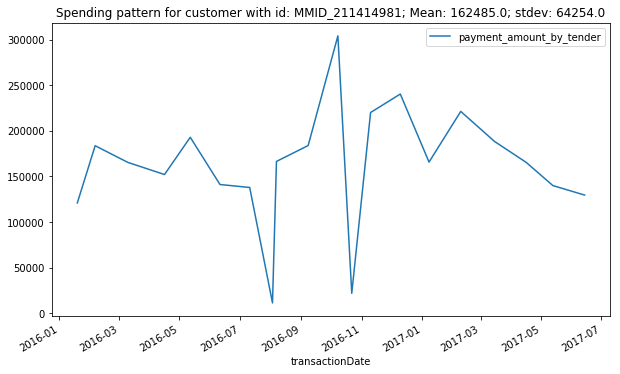

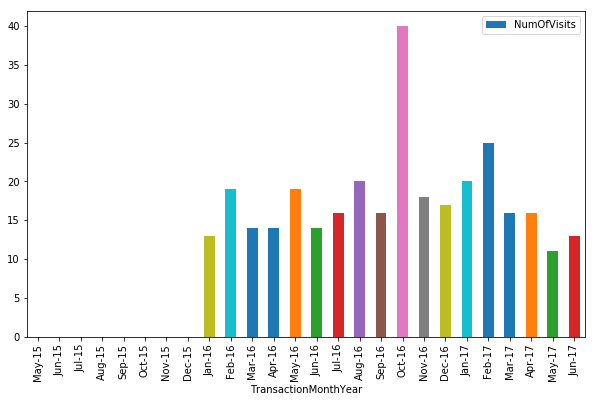

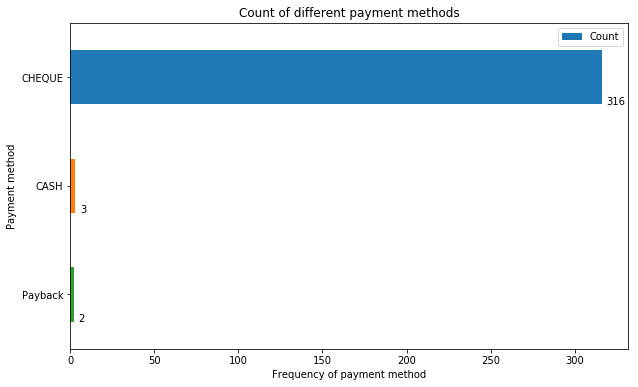

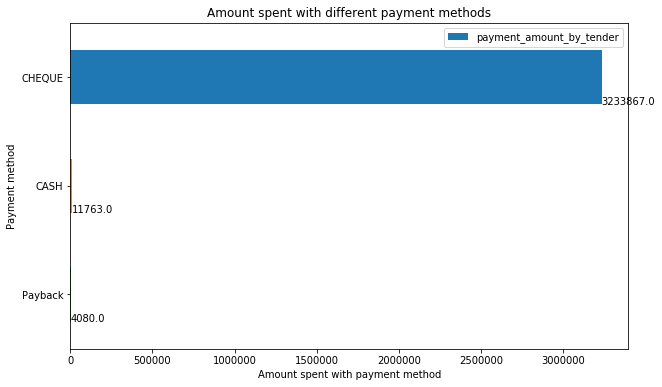

In [47]:
GetCustomerInfo(customer_db_df, txn_df, "MMID_211414981") # Customer with highest avg bill amount

,101796
customerID,MMID_2114104
Age,38
Gender,male
Recency,185
Frequency,3
Monetary,10319.3
ClusterLabel,2
FreqUsedStore,MM-HUBLI-GOKUL ROAD-AKSHAY CEN
FreqPaymentMethod,ICICI CREDIT CARD
AvgBillAmount,3440


,product_description,Count
0,GTS BULLET RAW SURTI KOLLAM RICE BAG 25K,2
2,16 ltr Super Saver Bucket Pink,1
3,SUNNY BRUSH WITH CONTAINER,1
4,PARLE BIS GLUCOSE 140g,1
5,PARLE CRM BIS HIDE N SEEK BOURBON 60g,1
6,PARLE SNK MEXITOS NACHO SLS TOMATINO 30g,1
7,PEPSODENT TPASTE 2 IN 1 150g,1
8,POTATO PREMIUM PKD,1
9,PRATHA AGARBATTI ROSE BX 15P,1
10,PRATHA AGARBATTI SANDAL BX 15P,1


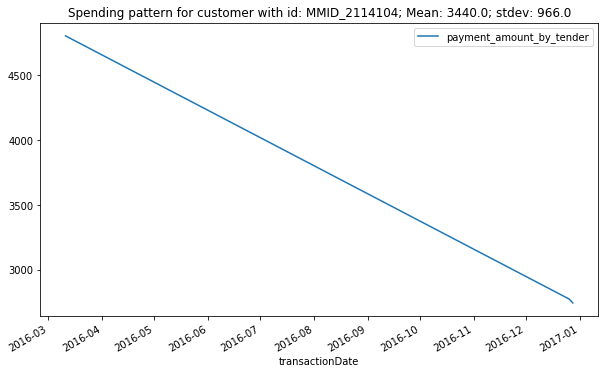

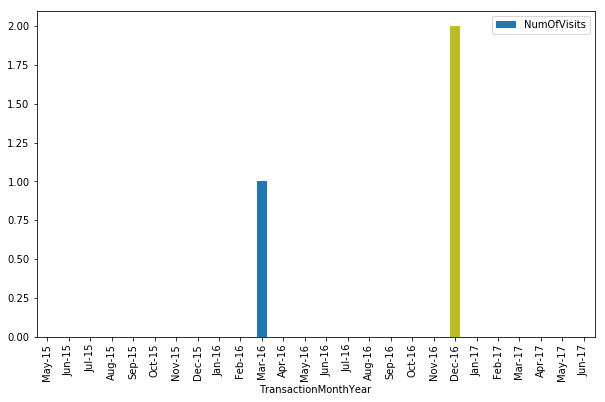

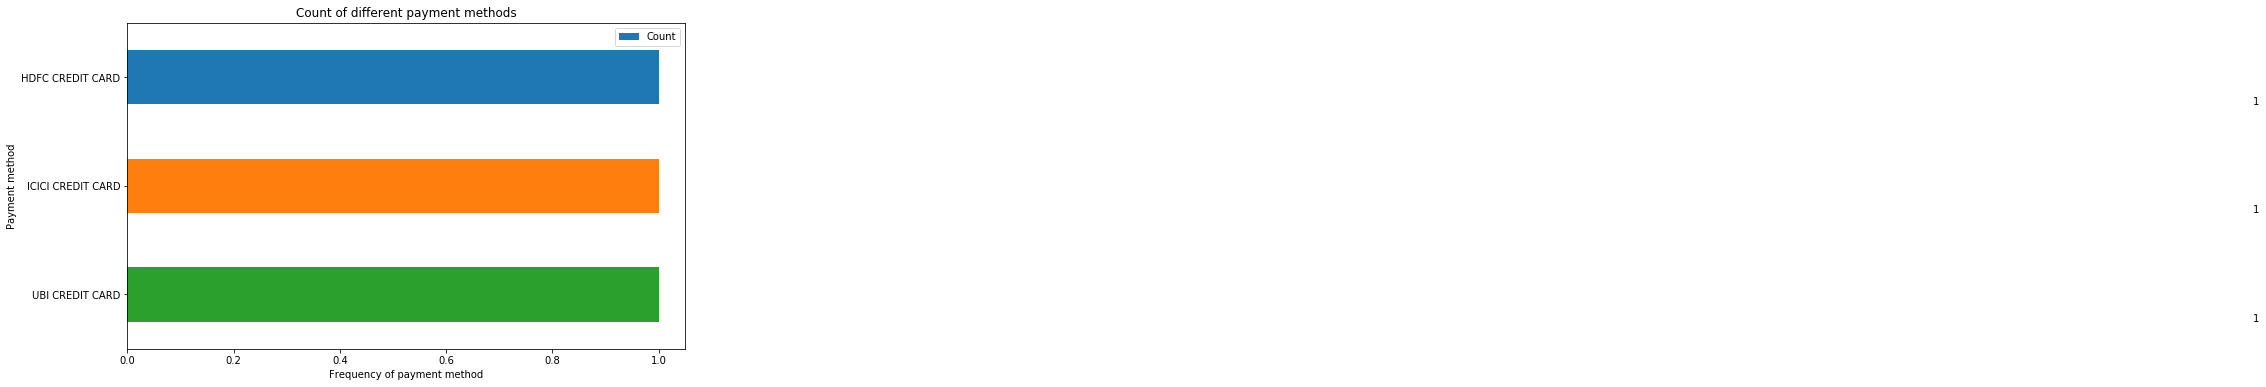

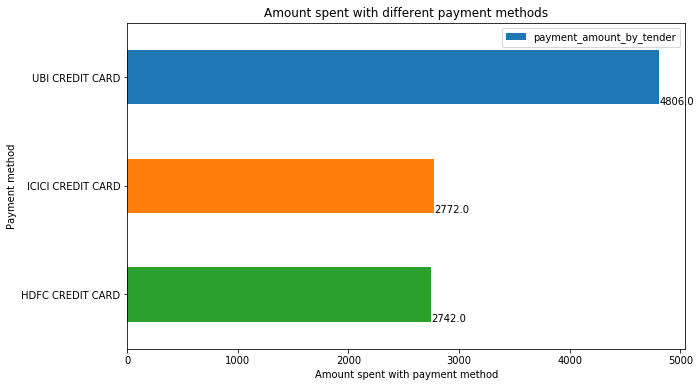

In [48]:
GetCustomerInfo(customer_db_df, txn_df, "MMID_2114104") 

,113218
customerID,MMID_211410869
Age,50
Gender,female
Recency,135
Frequency,16
Monetary,32407.6
ClusterLabel,2
FreqUsedStore,MM-HUBLI-GOKUL ROAD-AKSHAY CEN
FreqPaymentMethod,SBI CREDIT CARD
AvgBillAmount,2025


,product_description,Count
0,COLGATE TPST VISIBLE WHTE MINT 2*100g,7
2,TUR DAL PREM LOOSE,6
3,APPU STEAM SONA MASORI RICE BAG 25Kg,5
4,SANTOOR SOAP SANDAL&TURMERIC 4*150g,4
5,CINTHOL SOAP ORIGINAL 4*100g,4
6,RIN DET BAR 4*250g,3
7,PILLSBURY CHAKKI FRESH ATTA PP 5Kg,3
8,FORTUNE SUNFLOWER OIL JR 5L,3
9,Oct'16 CB Vouchers,3
10,Oct'16 ScratchCard,3


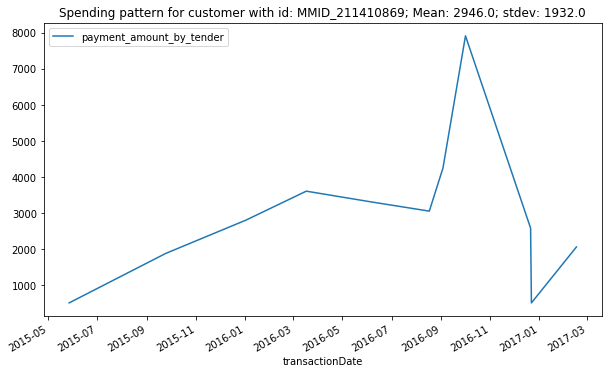

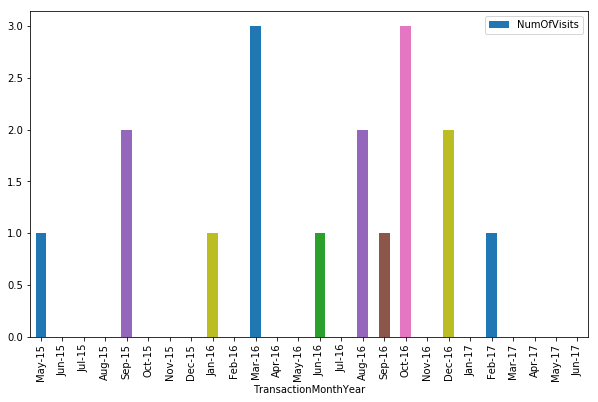

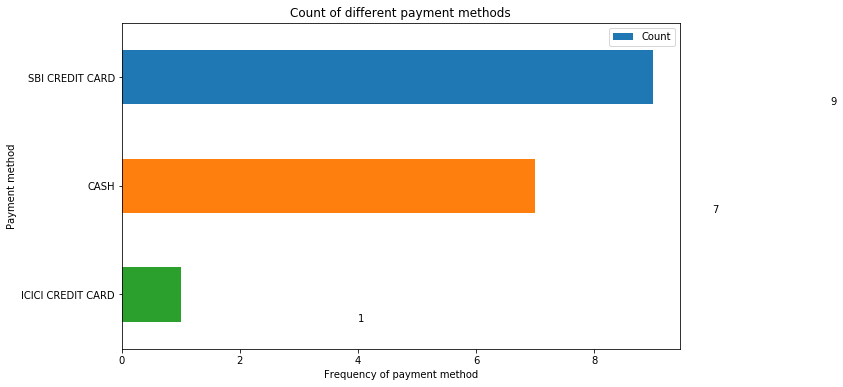

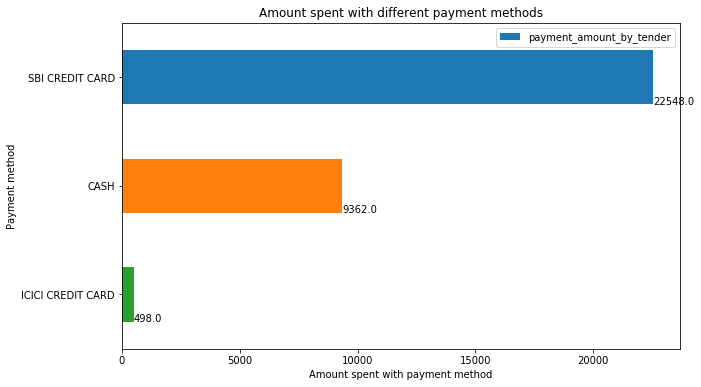

In [49]:
GetCustomerInfo(customer_db_df, txn_df, "MMID_211410869") 

,92380
customerID,MMID_20498166
Age,41
Gender,male
Recency,613
Frequency,1
Monetary,405000
ClusterLabel,1
FreqUsedStore,MM-MADURAI-KOCHADAI VILLAGE
FreqPaymentMethod,UBI CREDIT CARD
AvgBillAmount,405000


,product_description,Count
0,21Pcs New La Opala D/Set-Blissful Greens,1
2,21Pcs New La Opala D/Set-Divine Petals,1
3,21Pcs New La Opala D/Set-Silken Charm,1
4,21Pcs New La Opala D/Set-Trinity Green,1
5,F'15 Fstive Gift Card,1


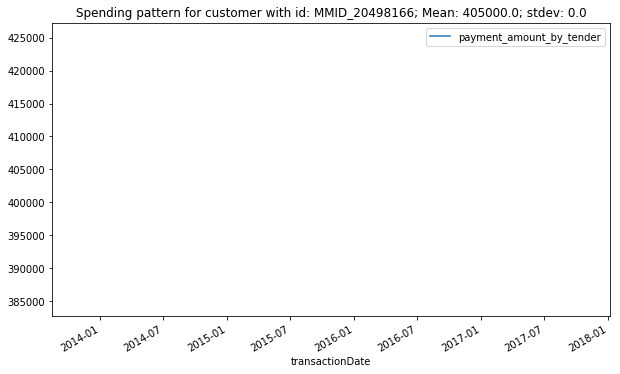

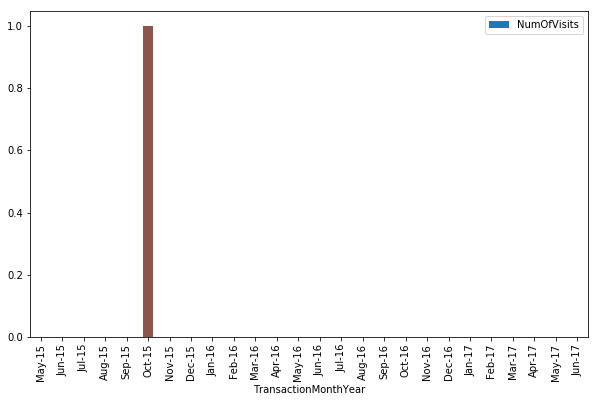

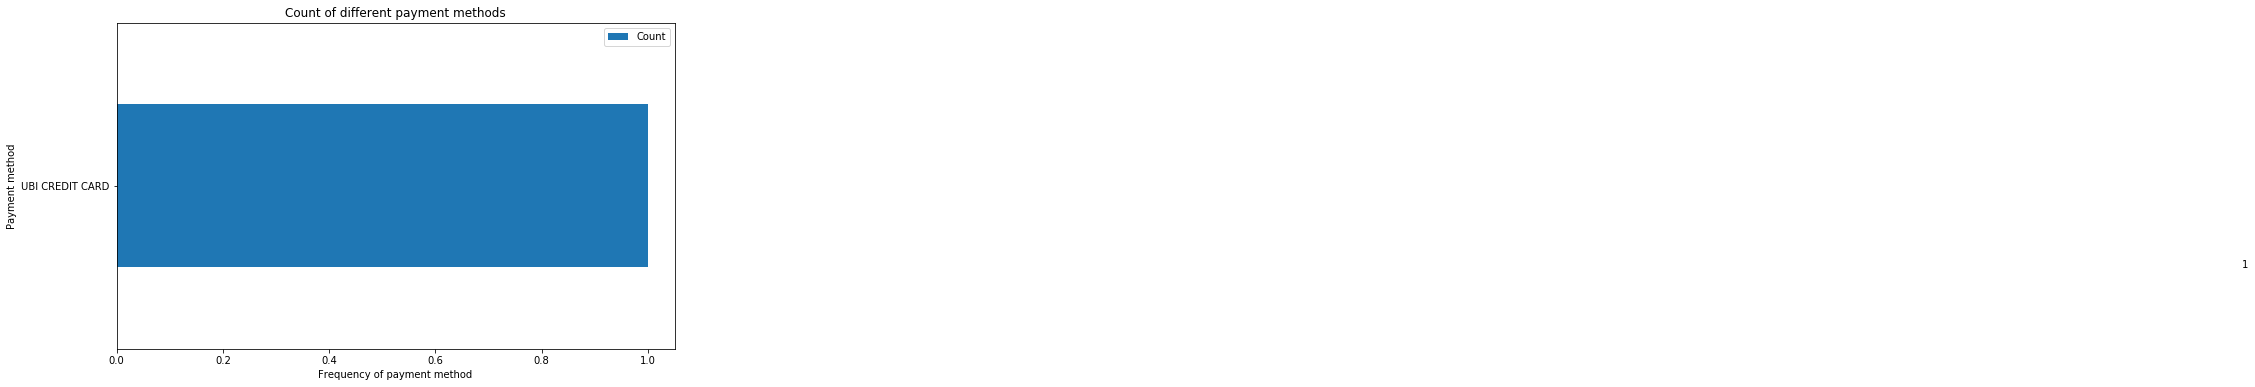

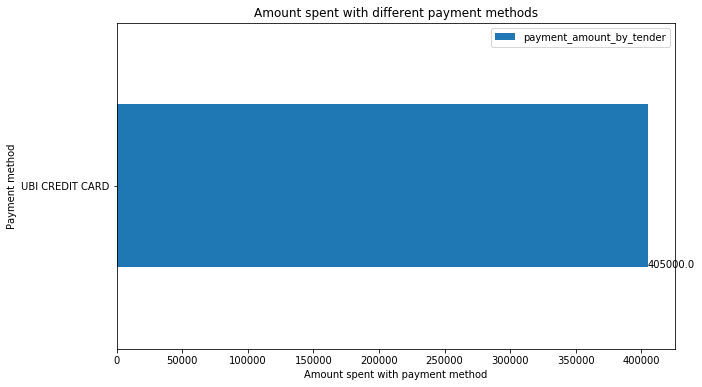

In [50]:
GetCustomerInfo(customer_db_df, txn_df, "MMID_20498166") # Customer with 1 visit and INR 405,000 bill

In [51]:
product_df.head(5)

,Unnamed: 0,customerID,DOB,Gender,State,PinCode,transactionDate,store_code,store_description,till_no,transaction_number_by_till,promo_code,promotion_description,product_code,product_description,sale_price_after_promo,discountUsed
0,0,MMID_2041,1981-10-18,male,NaN,452001,2016-01-19,2655,MM-INDORE-MALHAR MEGA MALL,2,51535,NONPROMO,NaN,300785147.0,BB-CB-16X20X168SWG-Suitable for ROI New,2.0,Payback
1,1,MMID_2041,1981-10-18,male,NaN,452001,2016-06-21,2655,MM-INDORE-MALHAR MEGA MALL,21,57836,NONPROMO,NaN,1000315939.0,SOO FRESH ROLL PIZZA 1PLT,40.0,Payback
2,2,MMID_2041,1981-10-18,male,NaN,452001,2016-04-07,2655,MM-INDORE-MALHAR MEGA MALL,21,43394,NONPROMO,NaN,1000314595.0,SOO FRESH PUFF PEAS & POTATO 1PLT,35.0,Payback
3,3,MMID_2041,1981-10-18,male,NaN,452001,2016-03-19,2655,MM-INDORE-MALHAR MEGA MALL,21,39335,NONPROMO,NaN,300930107.0,SOFRSH VD EGGS REGULAR 6P,72.0,Payback
4,4,MMID_2041,1981-10-18,male,NaN,452001,2016-01-19,2655,MM-INDORE-MALHAR MEGA MALL,2,51535,NONPROMO,NaN,1000010393.0,SOO FRESH BREAD BROWN 400g,15.0,Payback


In [52]:
def GetCustomerProductMatrix(store_name, customerID="ALL"):
    store_product_df = product_df[product_df['store_description'] == store_name]
    if (customerID != "ALL"):
        store_product_df = store_product_df[store_product_df['customerID'] == customerID]
    store_product_count_df = store_product_df.groupby(['customerID', 'product_description'])['product_code'].count().reset_index()
    #print(store_product_count_df.to_dict())
    store_product_count_df.rename({'product_code':'Count'}, axis=1, inplace=True)
    print(store_product_count_df)
    dict1 = {}
    for i in store_product_count_df['customerID'].unique():
        dict1[i] = [{store_product_count_df['product_description'][j]: store_product_count_df['Count'][j]} for j in store_product_count_df[store_product_count_df['customerID']==i].index]
    
    #print(dict1)
    #print(store_product_count_df[store_product_count_df['customerID'] == customerID].to_dict()) #MMID_211414981'])
    

In [53]:
def GetCustomerProductListDict(store_name, customerID="ALL"):
    store_product_df = product_df[product_df['store_description'] == store_name]
    if (customerID != "ALL"):
        store_product_df = store_product_df[store_product_df['customerID'] == customerID]
    listOfProducts = []
    listOfProducts = store_product_df['product_description']
    print(len(listOfProducts))
    store_product_count_df = store_product_df.groupby(['customerID', 'product_description'])['product_code'].count().reset_index()
    #print(store_product_count_df.to_dict())
    store_product_count_df.rename({'product_code':'Count'}, axis=1, inplace=True)
    #print(store_product_count_df)
    dict1 = {}
    for i in store_product_count_df['customerID'].unique():
        dict1[i] = [store_product_count_df['product_description'][j] for j in store_product_count_df[store_product_count_df['customerID']==i].index]
    
    print(dict1)
    #print(store_product_count_df[store_product_count_df['customerID'] == customerID].to_dict()) #MMID_211414981'])
    

In [54]:
GetCustomerProductListDict('MM-HUBLI-GOKUL ROAD-AKSHAY CEN', 'MMID_211414981')

2443
{'MMID_211414981': ['16 Litr Frosty Bucket Pink', '205/C MOPKING COTTON', '265 SWASH CARD 20*', '267 KINGKONG GRASS BROOM', 'AARTI OTH POOJA CAMPHOR ROUND', 'AARTI OTH POOJA HALDI 50g', 'AARTI OTH POOJA KUMKUM 50g', 'AASHIRVAAD SALT PP 1Kg', 'AASHIRVAAD WHOLE WHEAT ATTA PP 10Kg', 'AASHIRVAAD WHOLE WHEAT ATTA PP 5Kg', 'AER FRES SPRAY MORNING MEADOWS CN 300ml', 'AER FRES SPRAY VIOLET BLOOM CN 300ml', 'AER FRESHNER COOL SURF BLUE CN 300ml', 'AER FRESHNER FRESH LUSH GREEN CN 300ml', 'AER FRESHNER PETAL CRUSH PINK CN 300ml', 'AER FRESHNR MUSK AFTER SMOKE CN 300ml', 'AGRIPURE ATTA SAMPOORNA PP 5kg', 'AGRIPURE SONA MASOORI CLASSIC RICE 25Kg', 'AGRIPURE SONA MASOORI STANDRD RICE 25Kg', 'AIRWICK LIFE SC MYSTICAL GARDEN 210ml', 'AIRWICK LIFE SC SUMMER DELIGHT 210ml', 'AIRWICK LIFE SC TURQUOISE OASIS 210ml', 'AIRWICK RM FRSNR SPRAY LAVENDER DEW 249m', 'AIRWICK RM FRSNR SPRAY LMN GARDEN 249m', 'AIRWICK ROOM FRSN SPRAY VELVET ROSE 249m', 'AKAR IODISED CRYSTAL SALT PP 1Kg', 'ALLOUT BAYGON SPRAY

In [39]:
GetCustomerProductMatrix('MM-INDORE-MALHAR MEGA MALL')

            customerID                       product_description  Count
0            MMID_2041   BB-CB-16X20X168SWG-Suitable for ROI New      1
1            MMID_2041                         BOTTLE GOURD LONG      1
2            MMID_2041                               CAULIFLOWER      1
3            MMID_2041                                 CORIANDER      1
4            MMID_2041       ECO VALLEY OATS HEARTY PLAIN PP 1kg      1
5            MMID_2041          LACTOGEN INFANT FOOD NO2 RF 400g      1
6            MMID_2041                               RIDGE GOURD      1
7            MMID_2041               SANCHI BUTTER MILK PP 500ml      2
8            MMID_2041                 SOFRSH VD EGGS REGULAR 6P      1
9            MMID_2041                SOO FRESH BREAD BROWN 400g      1
10           MMID_2041         SOO FRESH PUFF PEAS & POTATO 1PLT      1
11           MMID_2041                 SOO FRESH ROLL PIZZA 1PLT      1
12          MMID_20410                 420 PAPAD PUNJB MSLA 400G

Dictionary
{customerID1, [(product1, count1), (product2, count2),...,(product2, count2)], customerID1, [(product1, count1), (product2, count2),...,(product2, count2)],...}

## Generate Product list in each transaction

In [ ]:
import csv

def GenerateTxnProductList(product_df, attribute, store_name, Label):
    product = "product_"+attribute
    prod_store_df = product_df[product_df['store_description'] == store_name]
    prod_store_txn_product_df = prod_store_df[['transaction_number_by_till', product]].copy()
    prod_store_txn_product_df = prod_store_txn_product_df.sort_values(['transaction_number_by_till', product])
    txn_list_of_products_store_df = prod_store_txn_product_df.groupby('transaction_number_by_till')[product].apply(lambda x: list(x.unique())).reset_index()

    outputFileName = Label+"_transactions_"+product+"s_"+store_name+".csv"
    with open(outputFileName, "w") as fp:
        for ind in txn_list_of_products_store_df.index:
            list1 = txn_list_of_products_store_df['product_description'][ind]
            if (len(list1) > 1):
                wr = csv.writer(fp, delimiter='\t')
                wr.writerow(list1)
    print("Output is in "+outputFileName)
            

In [59]:
GenerateTxnProductList(product_df, "description", "MM-INDORE-MALHAR MEGA MALL", 'Full')               

Output is in Full_transactions_product_descriptions_MM-INDORE-MALHAR MEGA MALL.csv


In [60]:
listOfProductsToBeOmitted = ["ONION LOOSE","POTATO LOOSE","TOMATO LOOSE","CORIANDER", 
                             "CUCUMBER GREEN LOOSE", "LADYFINGER LOOSE","BOTTLE GOURD LONG","CABBAGE",
                             "CAPSICUM GREEN","Carrot English Loose", "GINGER", "LEMON LOOSE",
                             "SUGAR MEDIUM LOOSE","TATA SALT PP 1Kg","CAULIFLOWER", "FB VG CHILLI RED MIRCHI",
                             "BRINJAL BHARTA PURPLE", "METHI","RIDGE GOURD", "FB SIS NAMKEENS",
                             "BB-CB-20X25X168SWG-Suitable for ROI New","BB-CB-20X25X208SWG NEW","BB-CB-27X30X208SWG NEW",
                             "BANANA ROBUSTA RAW,BB-CB-27X30X168SWG-Suitable for ROI New","GARLIC PREMIUM","GREEN PEAS",
                             "BANANA ROBUSTA RAW","BB-CB-27X30X168SWG-Suitable for ROI New","BROCCOLI","CAPSICUM RED LOOSE",
                             "MUSHROOM BUTTON"
                            ]
       
product_filtered_df = product_df[~product_df['product_description'].isin(listOfProductsToBeOmitted)]

In [61]:
GenerateTxnProductList(product_filtered_df, "description", "MM-INDORE-MALHAR MEGA MALL", 'Filtered')   

Output is in Filtered_transactions_product_descriptions_MM-INDORE-MALHAR MEGA MALL.csv


## Plot monthly revenue for different stores

                            Store  AvgMonthlySales
0      MM-INDORE-MALHAR MEGA MALL       11039529.0
0  MM-HUBLI-GOKUL ROAD-AKSHAY CEN       10749453.0
0             MM-JAMSHEDPUR-NH-33        8648633.0
0       MM-INDORE-TREASURE ISLAND        7936093.0
0     MM-MADURAI-KOCHADAI VILLAGE        5872038.0
0        MM-AMRITSAR-TRILIUM MALL        3747756.0
0        MM-LUDHIANA-FEROZEPUR-MF        2921969.0


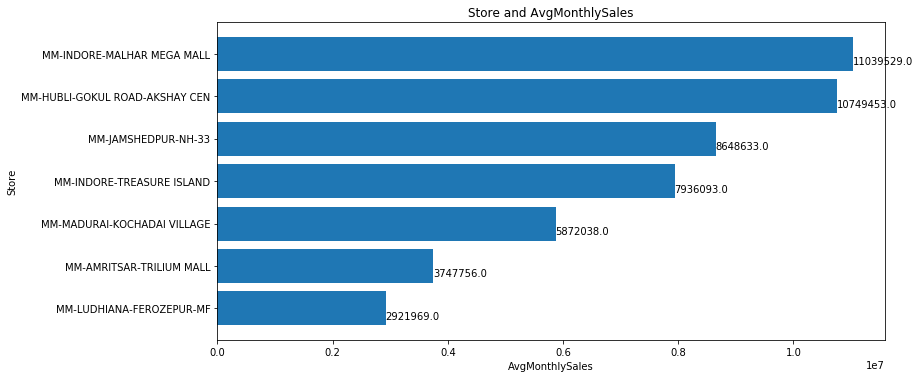

In [62]:
# Number of unique customers and sales amount end to end - monthwise

import numpy as np
import matplotlib.pyplot as plt

def PlotAvgMonthlySalesAcrossStores(txn_df):
    monthly_avg_sales_df = pd.DataFrame(columns=['Store', 'AvgMonthlySales'])
    for store in GetListOfStores(txn_df):
        txn_store_df = txn_df[txn_df.store_description == str(store)]    
        txn_store_df['TransactionMonthYear'] = txn_store_df.transactionDate.apply(lambda x: x.strftime("%b-%y"))
        txn_store_df['TransactionMonthYear'] = pd.to_datetime(txn_store_df.TransactionMonthYear, format = '%b-%y')        
        txn_withMonthName_df = txn_store_df
        sales_by_Month_df = txn_withMonthName_df.groupby(['TransactionMonthYear'])['payment_amount_by_tender'].sum().to_frame()
        sales_by_Month_df.rename({'payment_amount_by_tender':'SaleAmountRs'}, axis=1, inplace=True)
        sales_by_Month_df = sales_by_Month_df.sort_values('TransactionMonthYear', 
                                                                          ascending=False)
        #print(store,round(sales_by_Month_df.SaleAmountRs.mean(),0))
        df2 = pd.DataFrame([[store,round(sales_by_Month_df.SaleAmountRs.mean(),0)]],columns=['Store', 'AvgMonthlySales'])
        monthly_avg_sales_df = pd.concat([df2, monthly_avg_sales_df], axis=0)
        
    monthly_avg_sales_df.sort_values('AvgMonthlySales', ascending=False, inplace=True)
    print(monthly_avg_sales_df)
    #monthly_avg_sales_df.plot.barh(y='AvgMonthlySales', x='Store')
    PlotHorizontalBarChart(monthly_avg_sales_df, 'Store', 'AvgMonthlySales', 10, 5)
     
PlotAvgMonthlySalesAcrossStores(txn_df)

## Return the data for a time period (last x days)

In [63]:
def getProductDataTimePeriod(dataset_df, numOfDays):
    dataset_df['transactionDate'] = pd.to_datetime(dataset_df.transactionDate, format = '%Y-%m-%d')
    dataset_df[dataset_df['transactionDate'] > pd.to_datetime('2017-04-01', format = '%Y-%m-%d')]
    return(dataset_df[dataset_df['transactionDate'] > pd.to_datetime('2017-06-30', format = '%Y-%m-%d')- timedelta(days=numOfDays)])


In [64]:
listOfProductsToBeOmitted = ["ONION LOOSE","POTATO LOOSE","TOMATO LOOSE","CORIANDER", 
                             "CUCUMBER GREEN LOOSE", "LADYFINGER LOOSE","BOTTLE GOURD LONG","CABBAGE",
                             "CAPSICUM GREEN","Carrot English Loose", "GINGER", "LEMON LOOSE",
                             "SUGAR MEDIUM LOOSE","TATA SALT PP 1Kg","CAULIFLOWER", "FB VG CHILLI RED MIRCHI",
                             "BRINJAL BHARTA PURPLE", "METHI","RIDGE GOURD", "FB SIS NAMKEENS",
                             "BB-CB-20X25X168SWG-Suitable for ROI New","BB-CB-20X25X208SWG NEW","BB-CB-27X30X208SWG NEW",
                             "BANANA ROBUSTA RAW,BB-CB-27X30X168SWG-Suitable for ROI New","GARLIC PREMIUM","GREEN PEAS",
                             "BANANA ROBUSTA RAW","BB-CB-27X30X168SWG-Suitable for ROI New","BROCCOLI","CAPSICUM RED LOOSE",
                             "MUSHROOM BUTTON"
                            ]
       
product_filtered_df = product_df[~product_df['product_description'].isin(listOfProductsToBeOmitted)]

# Adhoc Analysis

In [ ]:
customer_db_df.sort_values(['AvgBillAmount'], ascending=False).head(5)

In [ ]:
np.round(customer_db_df['AvgBillAmount'].describe())

In [ ]:
customer_db_df['Monetary'].describe()

In [ ]:
np.round(customer_db_df['Frequency'].describe())

In [ ]:
txn_df.head(5)

In [ ]:
txn_df[txn_df['customerID'] == "MMID_20453330"].head(50)

In [ ]:
customer_db_df.sort_values(['Monetary'], ascending=False).head(5)

In [ ]:
len(txn_df[txn_df['customerID']=='MMID_211421442'])

In [ ]:
len(txn_df[txn_df['customerID']=='MMID_211419317'])

In [ ]:
len(txn_df[txn_df['customerID']=='MMID_20453330'])

In [ ]:
# Get info for a particular customer and transaction date
txn_df[txn_df.customerID == 'MMID_20453330'][txn_df.transactionDate == '2017-04-29'].head(5)

In [ ]:
product_df = pd.read_csv( "/Users/svattiku/Google Drive/BDA/ProjectBDA/Retail_Data/product_data.csv", 
                         dtype={'product_code':str})

In [ ]:
product_df[product_df['customerID'] == "MMID_20498166"]

In [ ]:
product_df[product_df['customerID'] == "MMID_211414981"] #Customer with higest monetary value

In [ ]:
txn_df[txn_df['customerID'] == "MMID_211414981"] #Customer with highest monetary value

In [ ]:
customer_db_df[customer_db_df['customerID'] == "MMID_20498166"]

In [ ]:
customer_db_df[customer_db_df['customerID'] == "MMID_211414981"]

In [ ]:
txn_df[txn_df['customerID'] == "MMID_211414981"][txn_df['DOB']=="NANA"] #Customer with highest monetary value

In [ ]:
del_RFM_Cluster_df = pd.read_csv("BB_CustomerSegments_3Clusters_ML_18Mar/3ClustersRFM.csv")

In [ ]:
del_RFM_Cluster_df[del_RFM_Cluster_df['customerID'] == "MMID_211414981"]

In [ ]:
txn_df[~txn_df["customerID"].str.contains("MMID")]
#All transactions have customer id with MMID

In [ ]:
cust_prod_df = product_df[product_df['customerID'] == "MMID_211414981"].groupby(['product_description'])['customerID'].count().to_frame().reset_index()
cust_prod_df.rename({"customerID": "Count"}, axis=1, inplace=True)
cust_prod_df.sort_values(by='Count', ascending = False, inplace=True)
cust_prod_df=cust_prod_df.reset_index().drop(columns=['index'], index=1)
len(cust_prod_df)
#display(HTML(cust_prod_df.head(10).to_html()))

In [ ]:
product_df[product_df['customerID'] == "MMID_20435"]

In [ ]:
len(product_df['customerID'].unique())

In [ ]:
len(product_df.customerID.unique()),len(product_df.transaction_number_by_till.unique()),len(product_df.product_description.unique())

In [ ]:
pdf = product_df[product_df['store_description'] == 'MM-HUBLI-GOKUL ROAD-AKSHAY CEN']
len(pdf[pdf['customerID'] == "MMID_2114104"])

In [ ]:
len(pdf[pdf['customerID'] == "MMID_211410869"].groupby('product_description')['till_no'].sum())

In [ ]:
len(pdf[pdf['customerID'] == "MMID_2114104"].groupby('product_description')['till_no'].sum())